In [2]:
import numpy as np

import matplotlib.pyplot as plt
import mplhep as hep

plt.style.use(hep.cms.style.ROOT)
plt.rcParams['axes.axisbelow'] = True

In [3]:
model_name = 'fgsm'#'nominal'
attacks = ['nominal','FGSM','FGSM_flavour_012008010','FGSM_domain_random']
#'FGSM_flavour_default','FGSM_domain_default',
names = np.load('/eos/user/h/heschone/DeepJet/Train_DF_Run2/{}/variables/names.npy'.format(model_name),allow_pickle=True)
variables = np.load('/eos/user/h/heschone/DeepJet/Train_DF_Run2/{}/variables/variables.npy'.format(model_name),allow_pickle=True)
variables_fgsm = np.load('/eos/user/h/heschone/DeepJet/Train_DF_Run2/{}/variables/variables_fgsm.npy'.format(model_name),allow_pickle=True)
variables_fgsm_flavour_default = np.load('/eos/user/h/heschone/DeepJet/Train_DF_Run2/{}/variables/variables_fgsm_flavour_default.npy'.format(model_name),allow_pickle=True)
variables_fgsm_flavour_012008010 = np.load('/eos/user/h/heschone/DeepJet/Train_DF_Run2/{}/variables/variables_fgsm_flavour_012008010.npy'.format(model_name),allow_pickle=True)
variables_fgsm_domain_default = np.load('/eos/user/h/heschone/DeepJet/Train_DF_Run2/{}/variables/variables_fgsm_domain_default.npy'.format(model_name),allow_pickle=True)
variables_fgsm_domain_random = np.load('/eos/user/h/heschone/DeepJet/Train_DF_Run2/{}/variables/variables_fgsm_domain_random.npy'.format(model_name),allow_pickle=True)

In [4]:
attack_labels = {
    'nominal': 'nominal',
    'FGSM': r'FGSM $\epsilon=0.01$',
    'FGSM_flavour_default': r'FGSM $\epsilon=(0.01,0.01,0.01)$',
    'FGSM_flavour_012008010': r'FGSM $\epsilon=(0.012,0.008,0.01)$',
    'FGSM_domain_default': r'FGSM $\hat{\epsilon}=0.01$',
    'FGSM_domain_random': r'FGSM $\hat{\epsilon}=$random initialization ~ U(0,0.02)',
}
attack_arrays = {
    'nominal': variables,
    'FGSM': variables_fgsm,
    'FGSM_flavour_default': variables_fgsm_flavour_default,
    'FGSM_flavour_012008010': variables_fgsm_flavour_012008010,
    'FGSM_domain_default': variables_fgsm_domain_default,
    'FGSM_domain_random': variables_fgsm_domain_random,
}
attack_colors = {
    'nominal': 'tab:blue',
    'FGSM': 'tab:orange',
    'FGSM_flavour_default': 'tab:red',
    'FGSM_flavour_012008010': 'tab:red',
    'FGSM_domain_default': 'tab:purple',
    'FGSM_domain_random': 'tab:purple',
}

quantity_indices = {
    'jet_pt': 0,
    'jet_eta': 0, 
    'nCpfcand': 0, 
    'nNpfcand': 0, 
    'sv_pt': 0, 
    'sv_deltaR': 0,
    'sv_mass': 0, 
    'sv_dxy': 0, 
    'sv_dxysig': 0, 
    'sv_d3d': 0, 
    'sv_d3dsig': 0, 
    'isB': 0,
    'isBB': 0, 
    'isLeptonicB': 0, 
    'isC': 0, 
    'isUDS': 0, 
    'isG': 0, 
    'prob_isB': 0,
    'prob_isBB': 0, 
    'prob_isLeptonicB': 0, 
    'prob_isC': 0, 
    'prob_isUDS': 0,
    'prob_isG': 0,
}
for i in range(len(names)):
    quantity_indices[names[i]] = i
    
quantity_labels = {
    'jet_pt': '$p_{T,jet}[GeV]$',
    'jet_eta': '$\eta_{jet}$', 
    'nCpfcand': 'N_{CPF}', 
    'nNpfcand': 'N_{NPF}', 
    'sv_pt': '$p_{T,SV}[GeV]$', 
    'sv_deltaR': '$\Delta R(PV,SV)$',
    'sv_mass': '$m_{SV}[GeV]$', 
    'sv_dxy': '2D IP[mm]', 
    'sv_dxysig': '2D IP significance[mm]', 
    'sv_d3d': '3D IP[mm]', 
    'sv_d3dsig': '3D IP significance[mm]', 
    'isB': 0,
    'isBB': 0, 
    'isLeptonicB': 0, 
    'isC': 0, 
    'isUDS': 0, 
    'isG': 0, 
    'prob_isB': 'P(b)',
    'prob_isBB': 'P(bb)', 
    'prob_isLeptonicB': 'P(lep b)', 
    'prob_isC': 'P(c)', 
    'prob_isUDS': 'P(uds)',
    'prob_isG': 'P(g)',
}

nominal
FGSM
FGSM_flavour_012008010
FGSM_domain_random
saving
nominal
FGSM
FGSM_flavour_012008010
FGSM_domain_random
saving


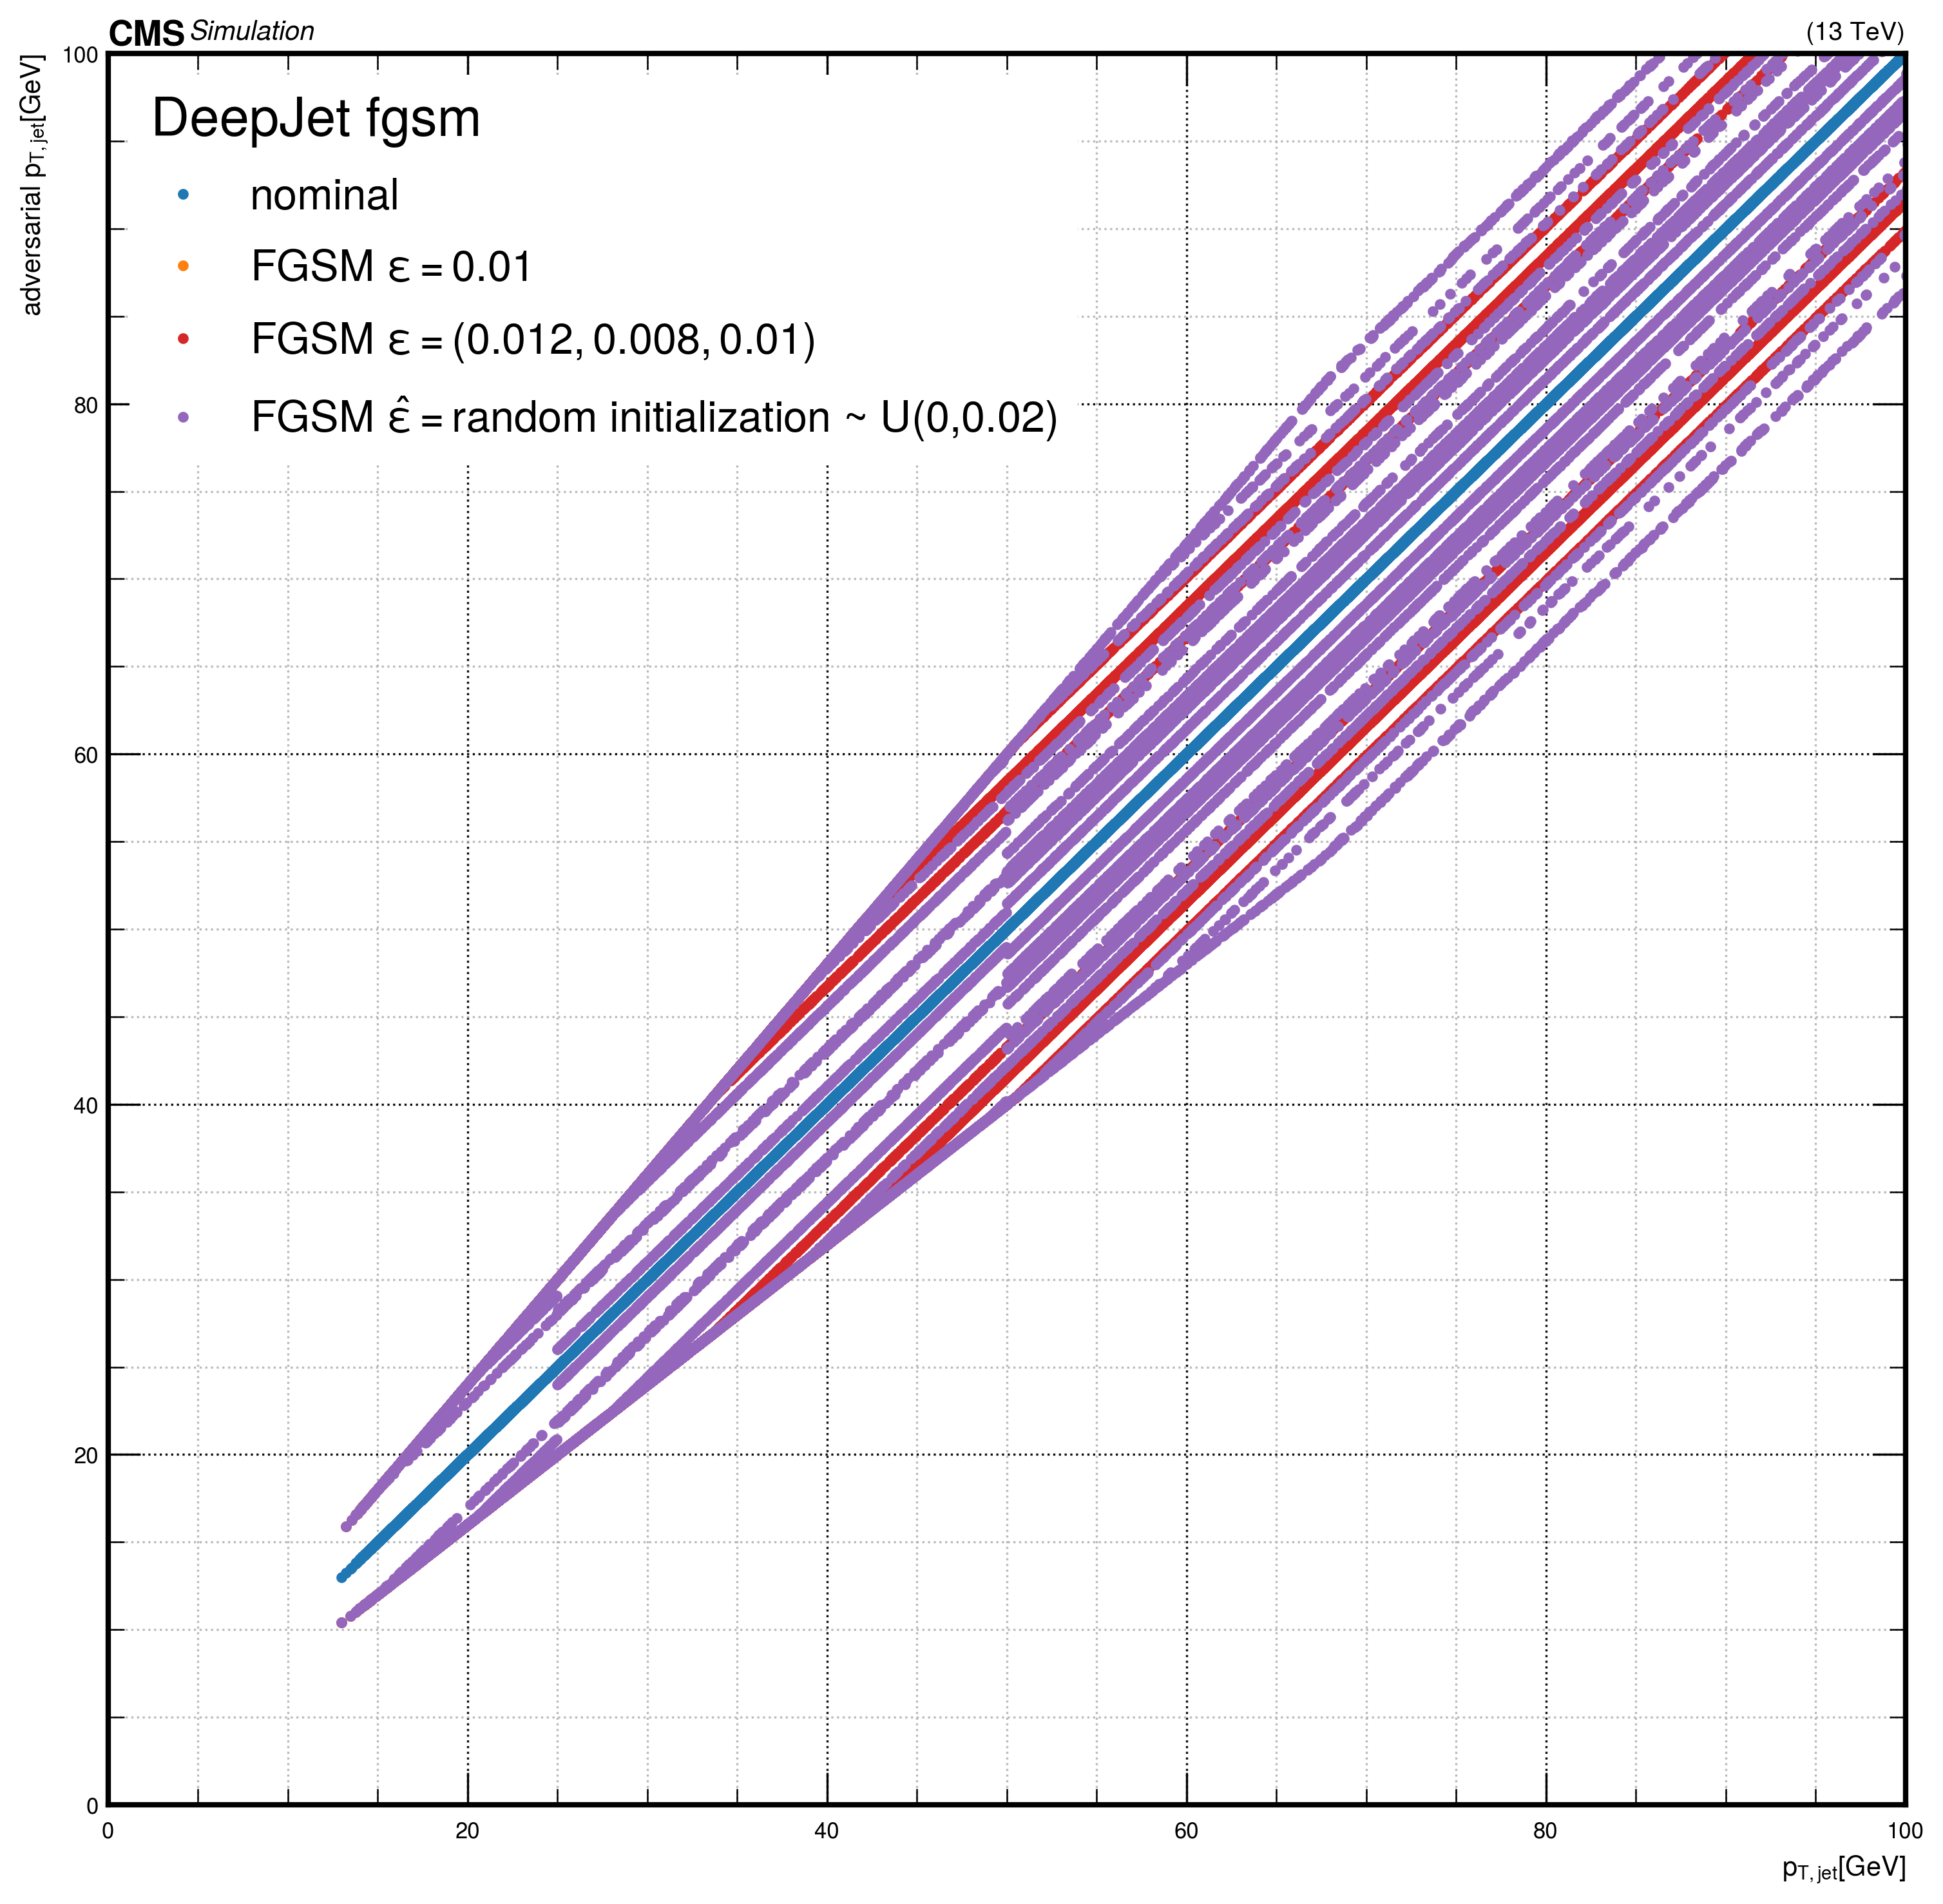

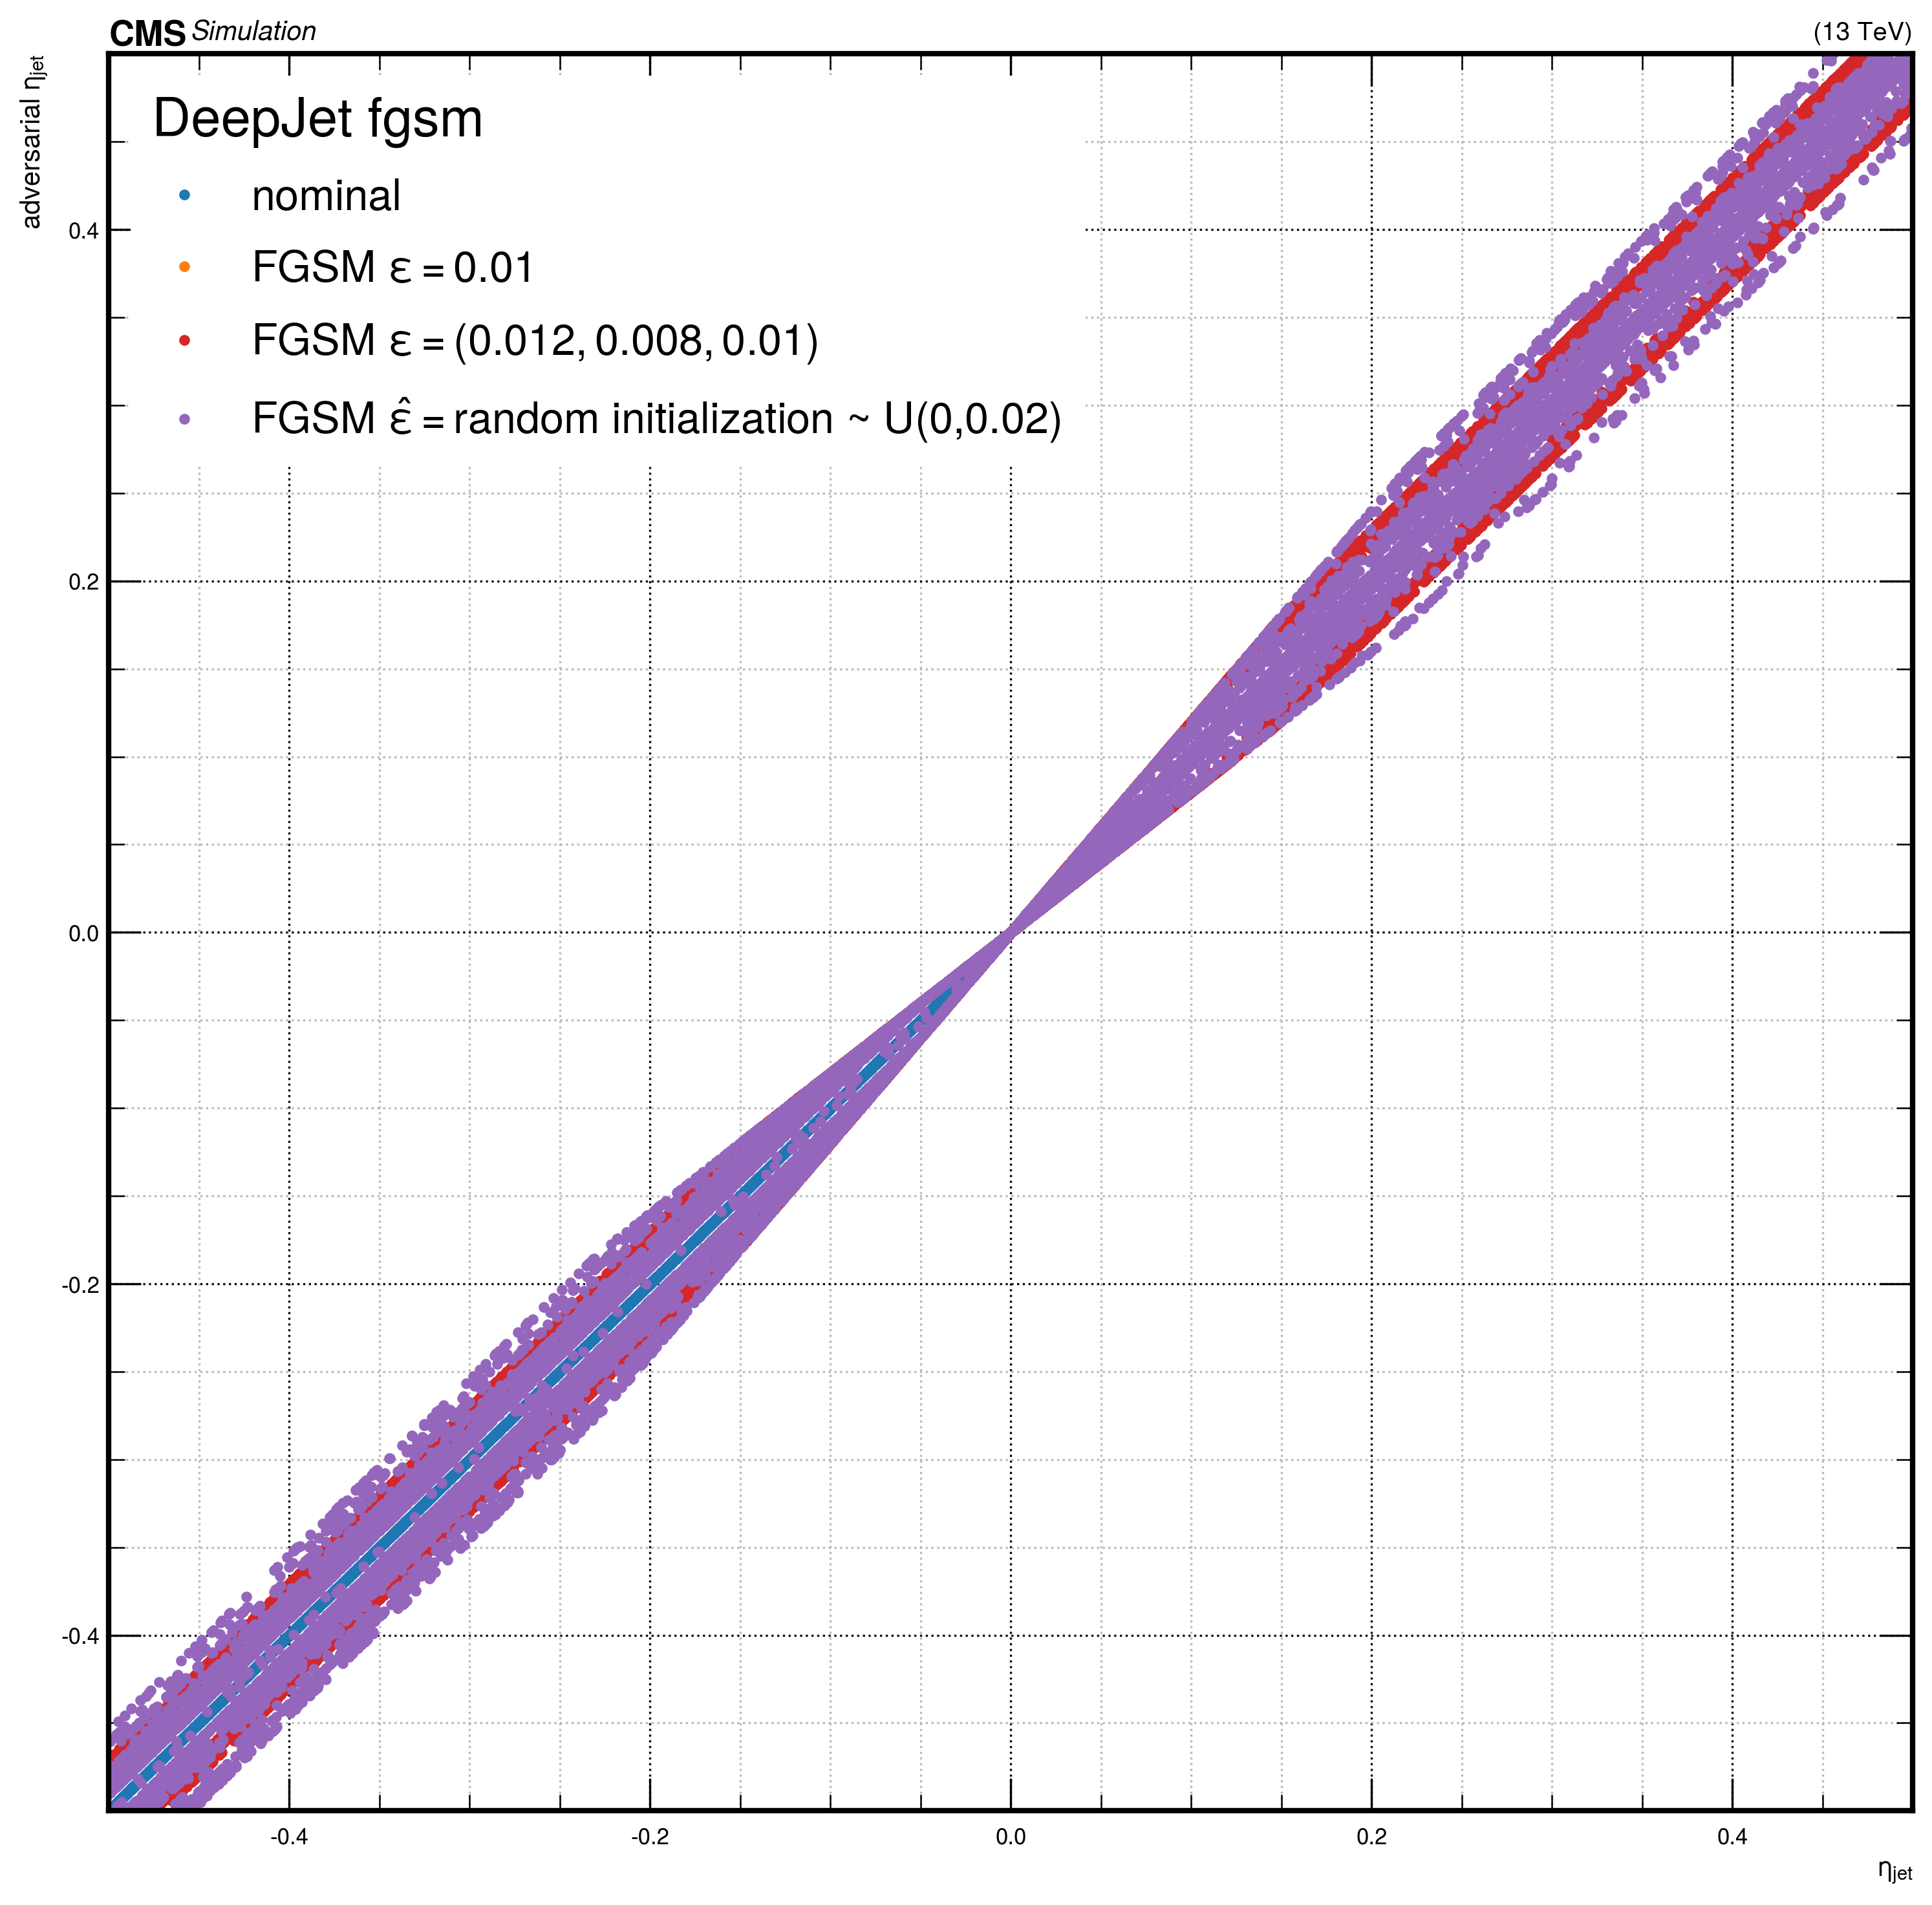

In [5]:
#plot quantities before and after the attack

quantities = ['jet_pt','jet_eta']
ranges = [[0,100],[-0.5,0.5]]

for i in range(len(quantities)):
    quantity = quantities[i]
    index = quantity_indices[quantity]
    fig,ax = plt.subplots(figsize=[12,12], dpi=300)
    ax.set_xlim(left=ranges[i][0], right=ranges[i][1])
    ax.set_ylim(bottom=ranges[i][0])
    ax.set_ylim(top=ranges[i][1])
    ax.set_ylabel('adversarial '+ quantity_labels[quantity])
    ax.set_xlabel(quantity_labels[quantity])
    ax.grid(which='minor', alpha=0.85)
    ax.grid(which='major', alpha=0.95, color='black')

    for attack in attacks:
        print(attack)
        x = attack_arrays['nominal'][index]
        y = attack_arrays[attack][index]
        ax.plot(x,y,linestyle='None',marker='.',color=attack_colors[attack],label=attack_labels[attack])
    legloc = 'upper left'
    leg=ax.legend(title='DeepJet '+model_name,fontsize=16,title_fontsize=20,labelspacing=0.7,loc='upper left',frameon=True,framealpha=1,facecolor='white')
    if 'right' in legloc:
        aligned = 'right'
    else:
        aligned = 'left'
    leg._legend_box.align = aligned
    leg.get_frame().set_linewidth(0.0)
    hep.cms.label(rlabel='(13 TeV)')
    print('saving')
    fig.savefig('variable_plots/{}_{}_attacks.pdf'.format(model_name,quantity))

FGSM
FGSM_flavour_012008010
FGSM_domain_random
saving


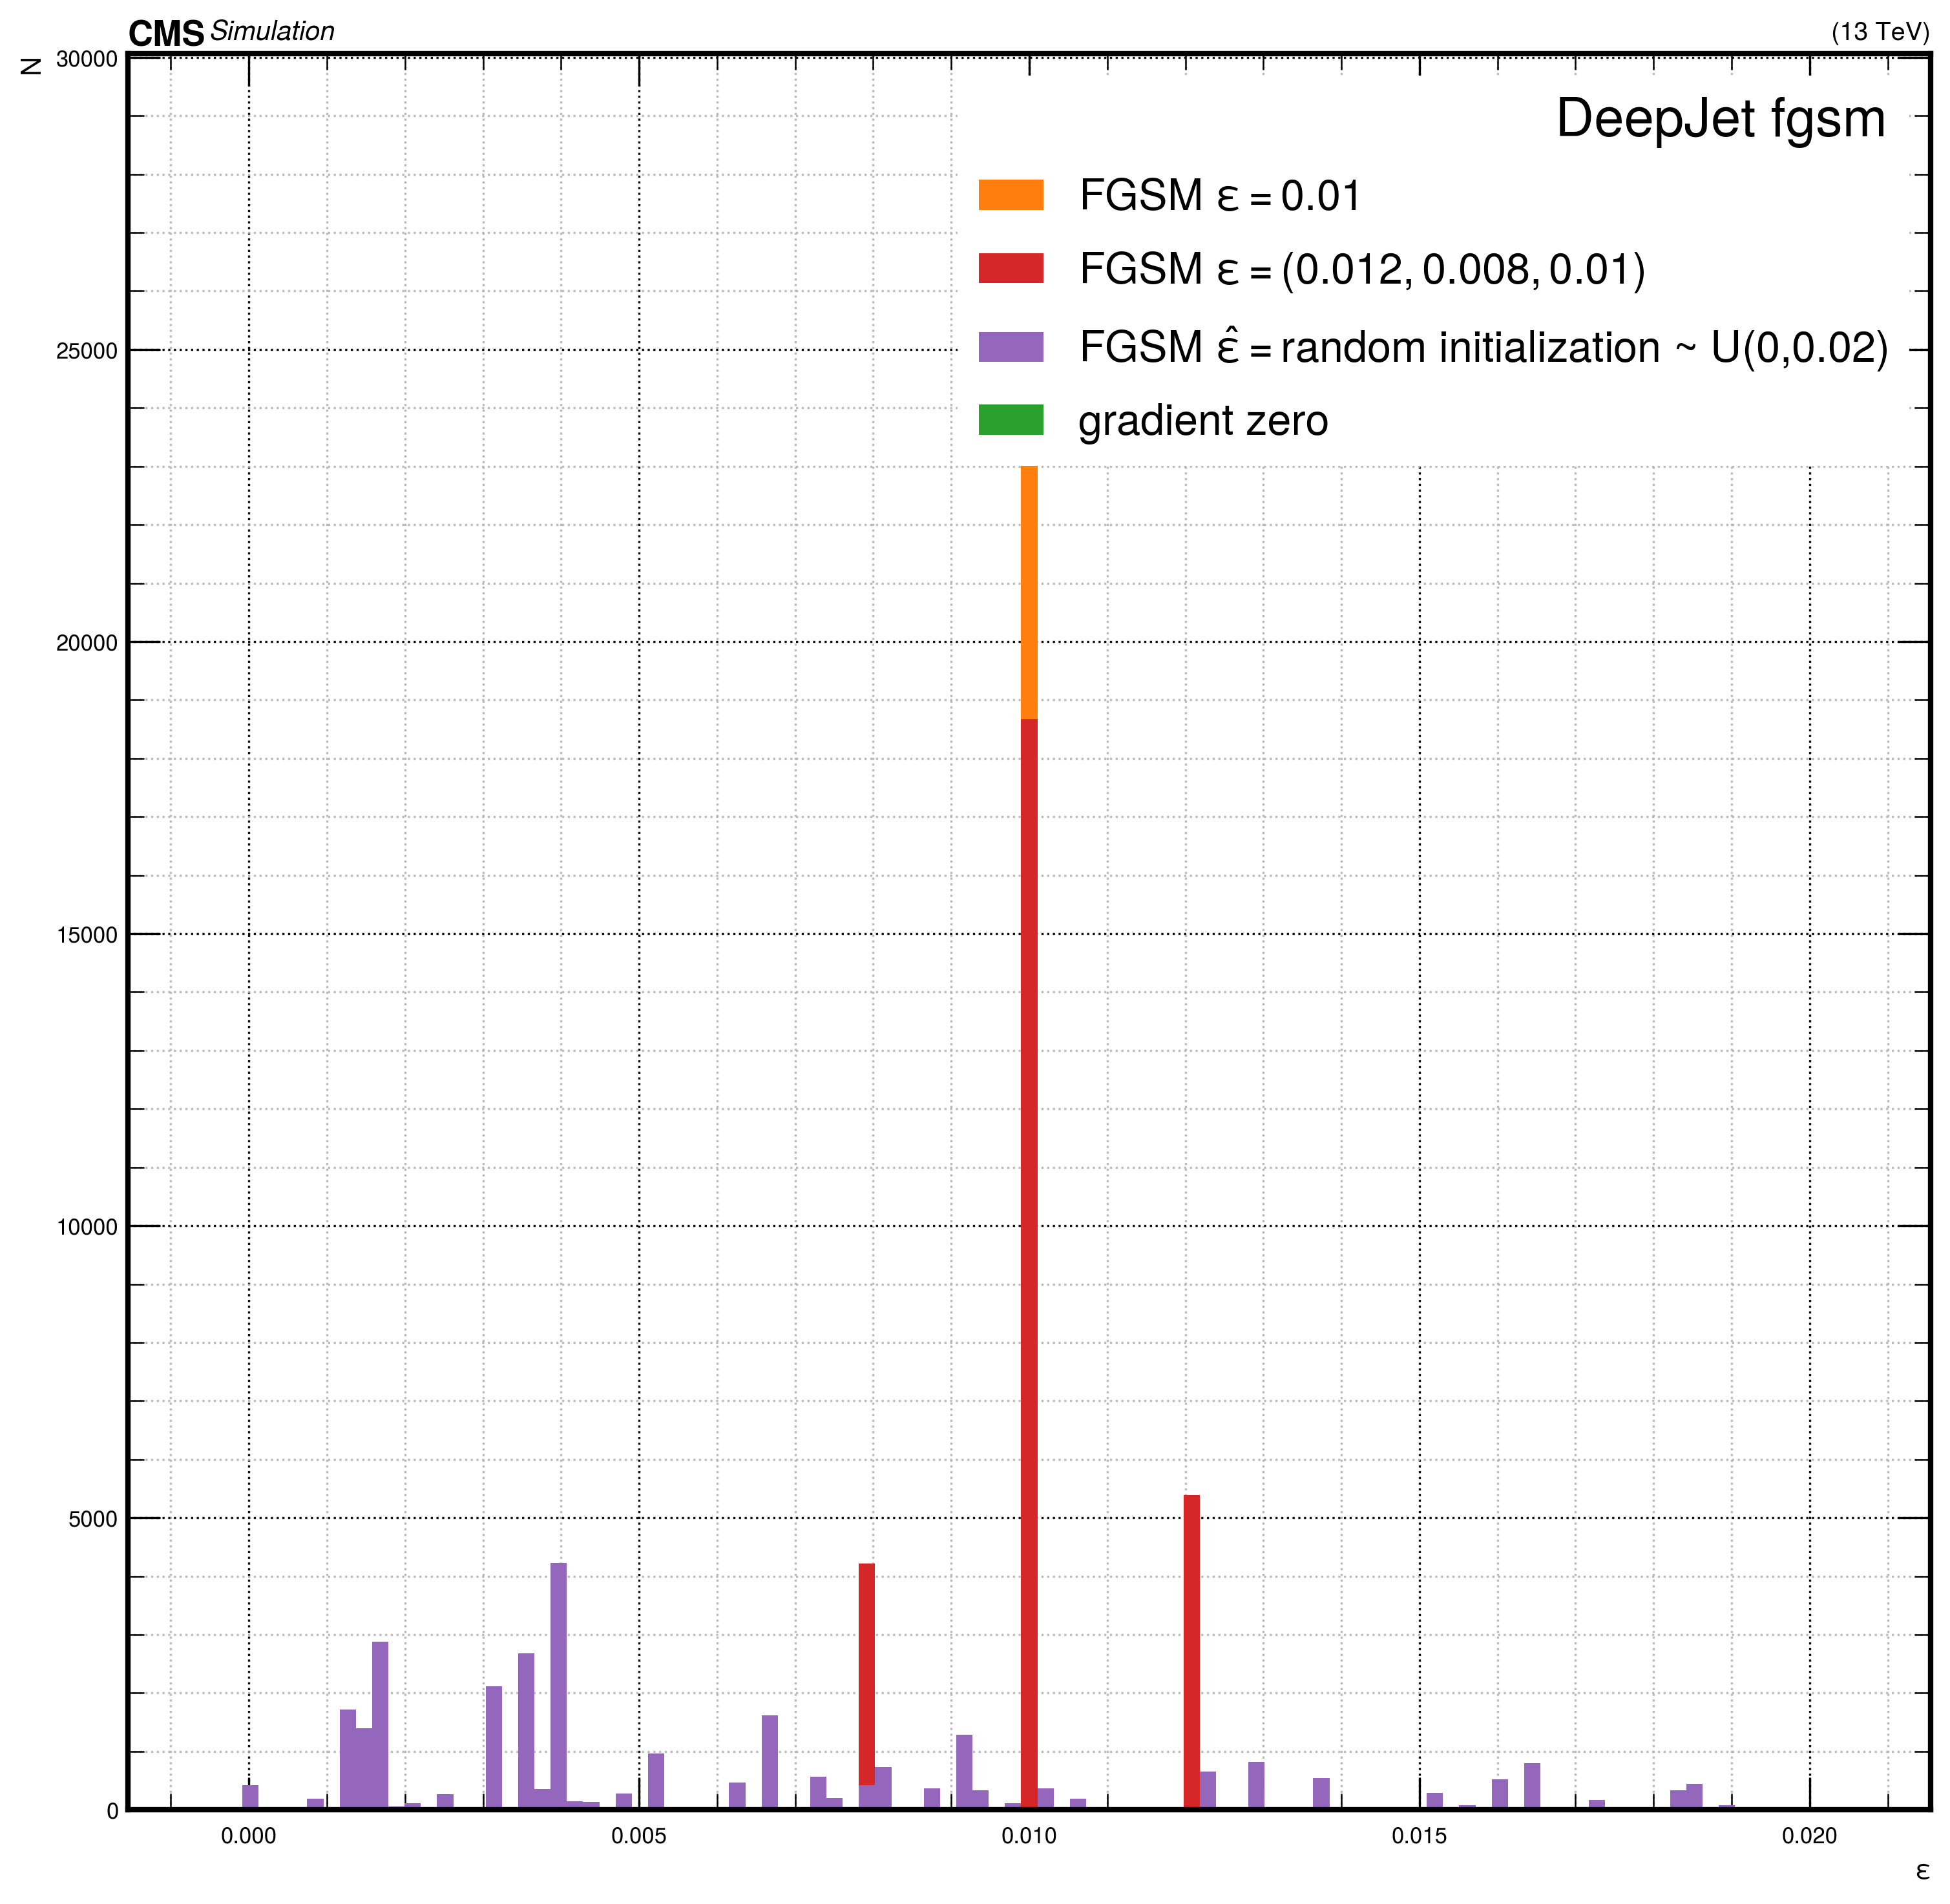

In [6]:
# plot the epsilons
norm = np.load('/afs/cern.ch/user/h/heschone/private/DeepJet/epsilons/global_epsilons.npy')[0]

attacks = ['FGSM','FGSM_flavour_012008010','FGSM_domain_random']

fig,ax = plt.subplots(figsize=[12,12], dpi=300)
ax.set_ylabel('N')
ax.set_xlabel('$\epsilon$')
ax.grid(which='minor', alpha=0.85)
ax.grid(which='major', alpha=0.95, color='black')
for attack in attacks:
    print(attack)
    epsilon=np.absolute(attack_arrays[attack][0]-attack_arrays['nominal'][0])/norm
    factor=np.absolute(attack_arrays[attack][0]-attack_arrays['nominal'][0])/attack_arrays['nominal'][0]
    restrict_impact=np.where(abs(factor-0.2)<0.0001,1,0)
    epsilon=np.where(restrict_impact==0,epsilon,-1)
    ax.hist(epsilon, bins=101, range=(-0.0005,0.0205), color=attack_colors[attack], label=attack_labels[attack])
    zeros=(epsilon==0).nonzero()[0]
ax.hist(zeros*0, bins=101, range=(-0.0005,0.0205), color='tab:green', label='gradient zero')
legloc = 'upper right'
leg=ax.legend(title='DeepJet '+model_name,fontsize=16,title_fontsize=20,labelspacing=0.7,loc=legloc,frameon=True,framealpha=1,facecolor='white')
if 'right' in legloc:
    aligned = 'right'
else:
    aligned = 'left'
leg._legend_box.align = aligned
leg.get_frame().set_linewidth(0.0)
hep.cms.label(rlabel='(13 TeV)')
print('saving')
fig.savefig('variable_plots/{}_epsilons.pdf'.format(model_name))

In [7]:
# Investigate the zero epsilon entries
zero_flavours = variables[11,zeros]*1 + variables[12,zeros]*2 + variables[13,zeros]*3 + variables[14,zeros]*4 + variables[15,zeros]*5 +variables[16,zeros]*6
print(zeros)
print(epsilon[zeros])
print(zero_flavours)

[]
[]
[]


saving
saving


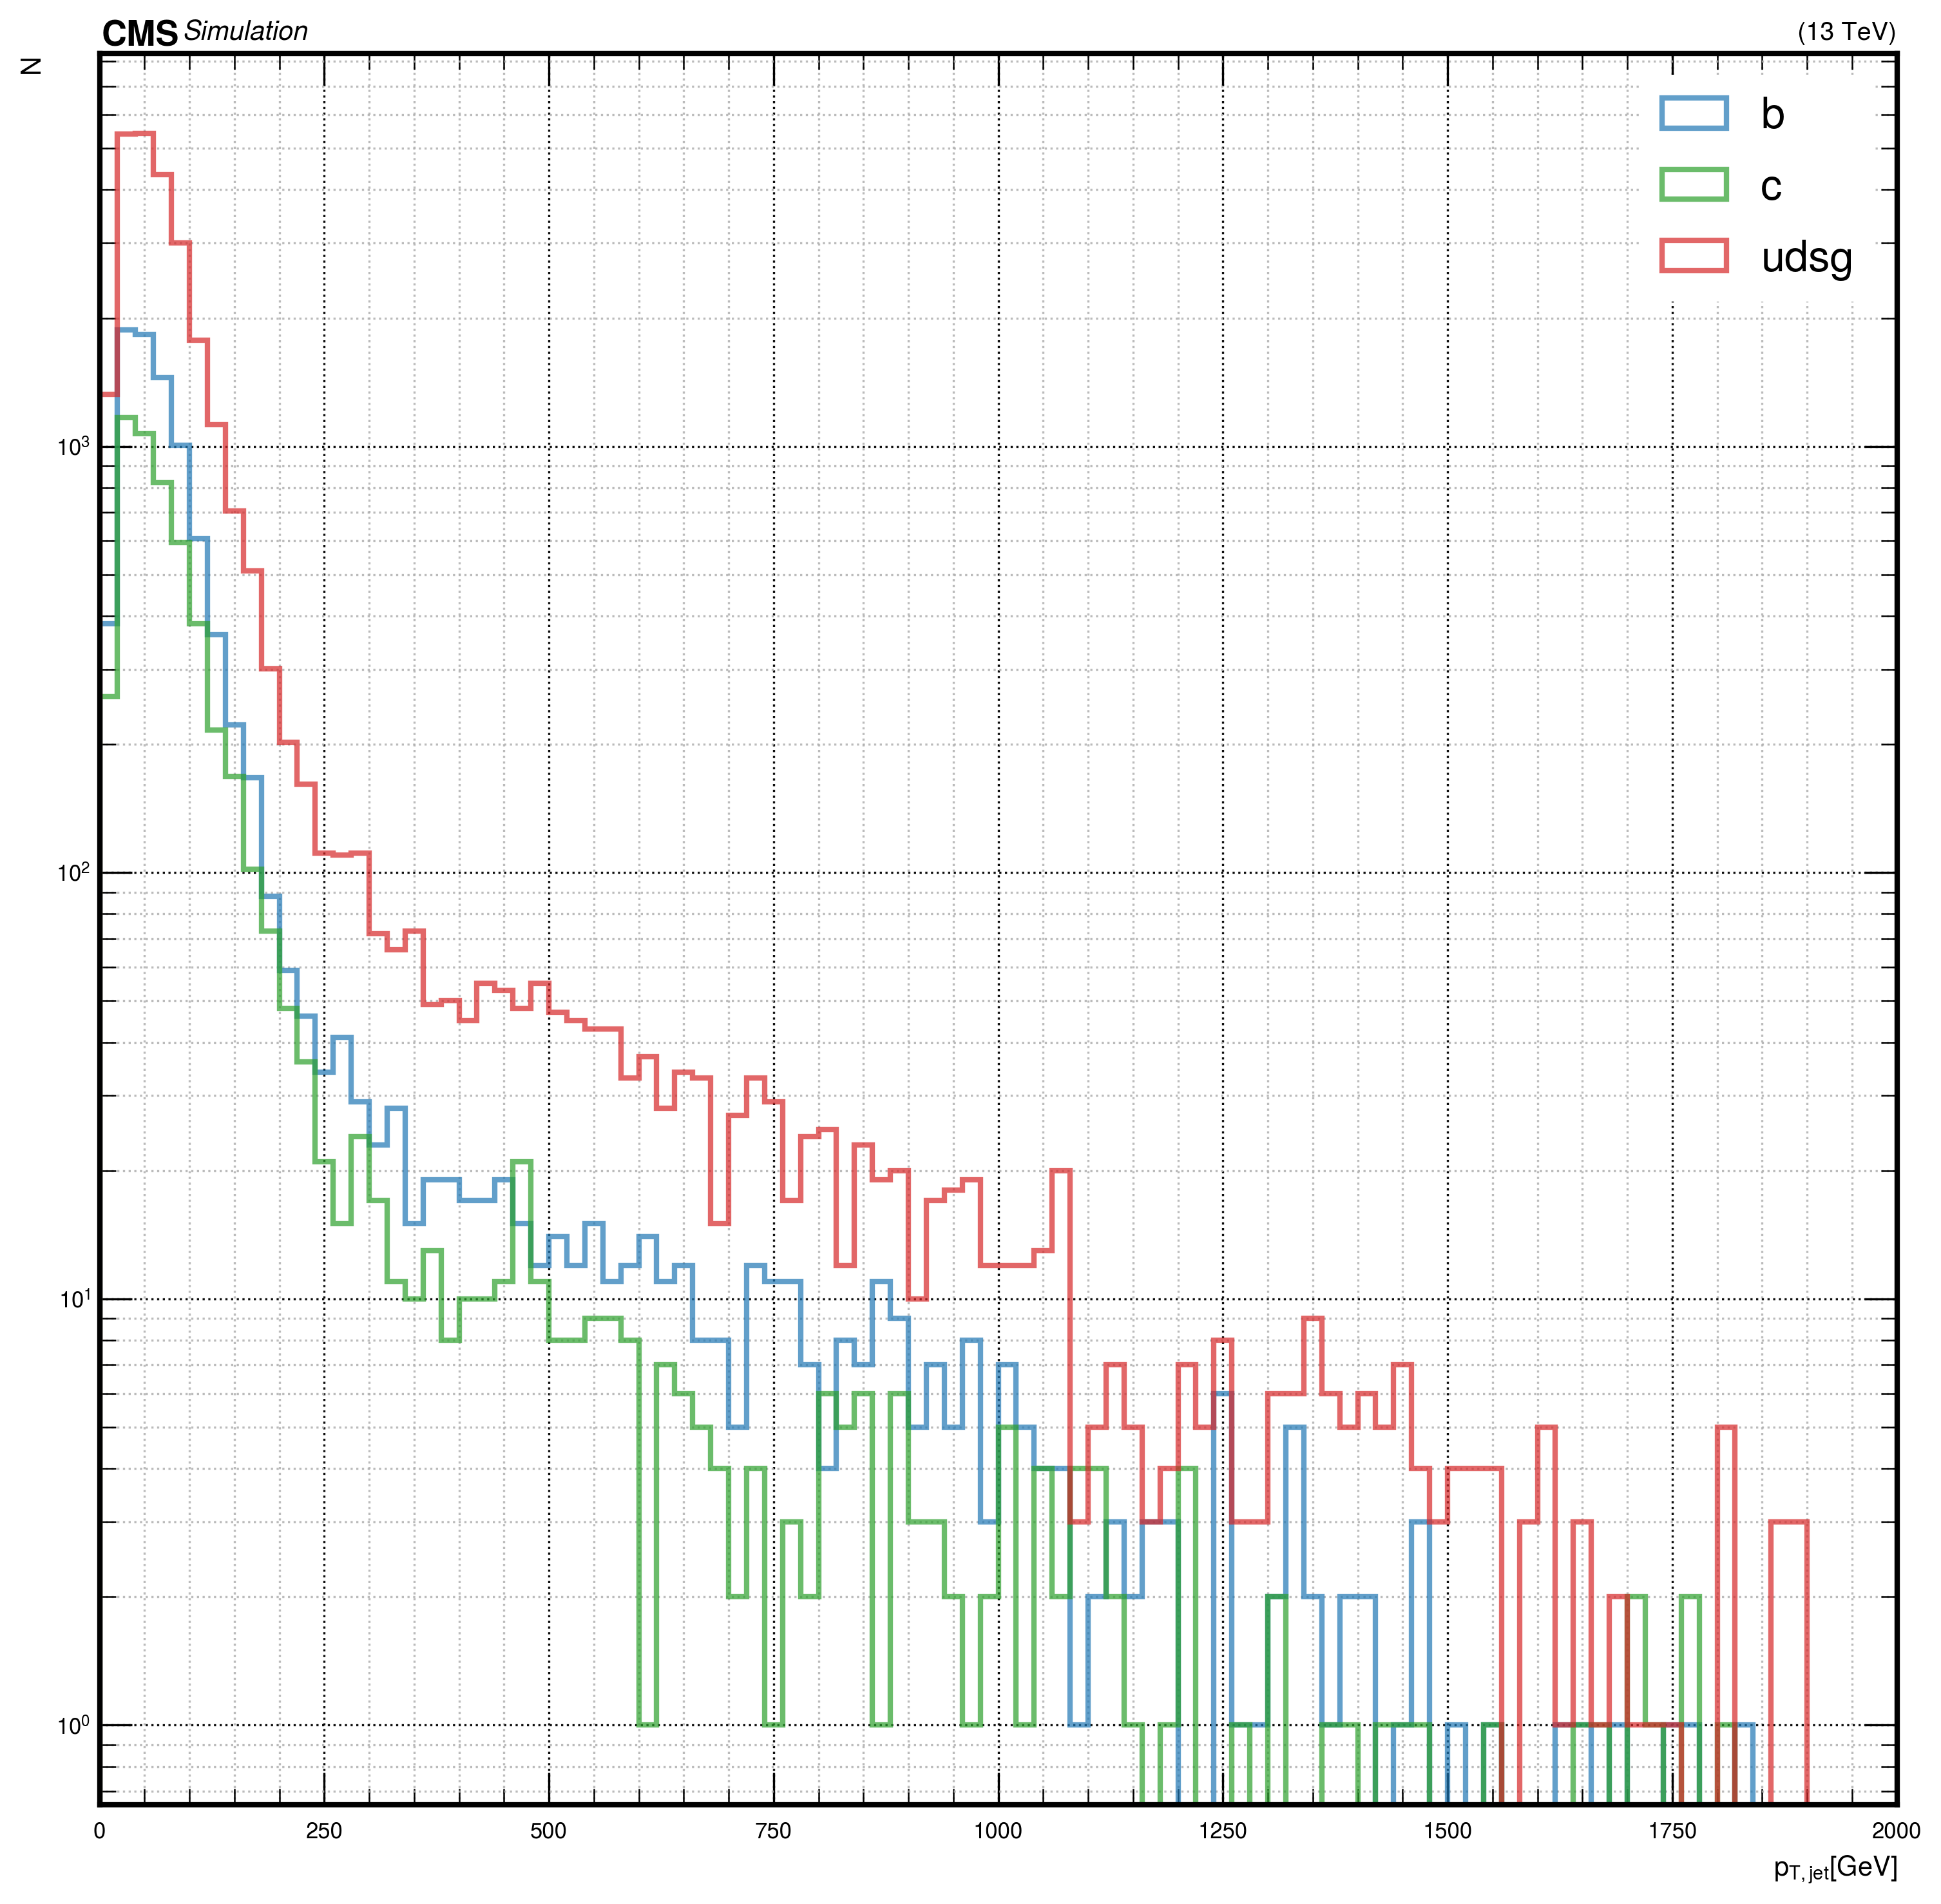

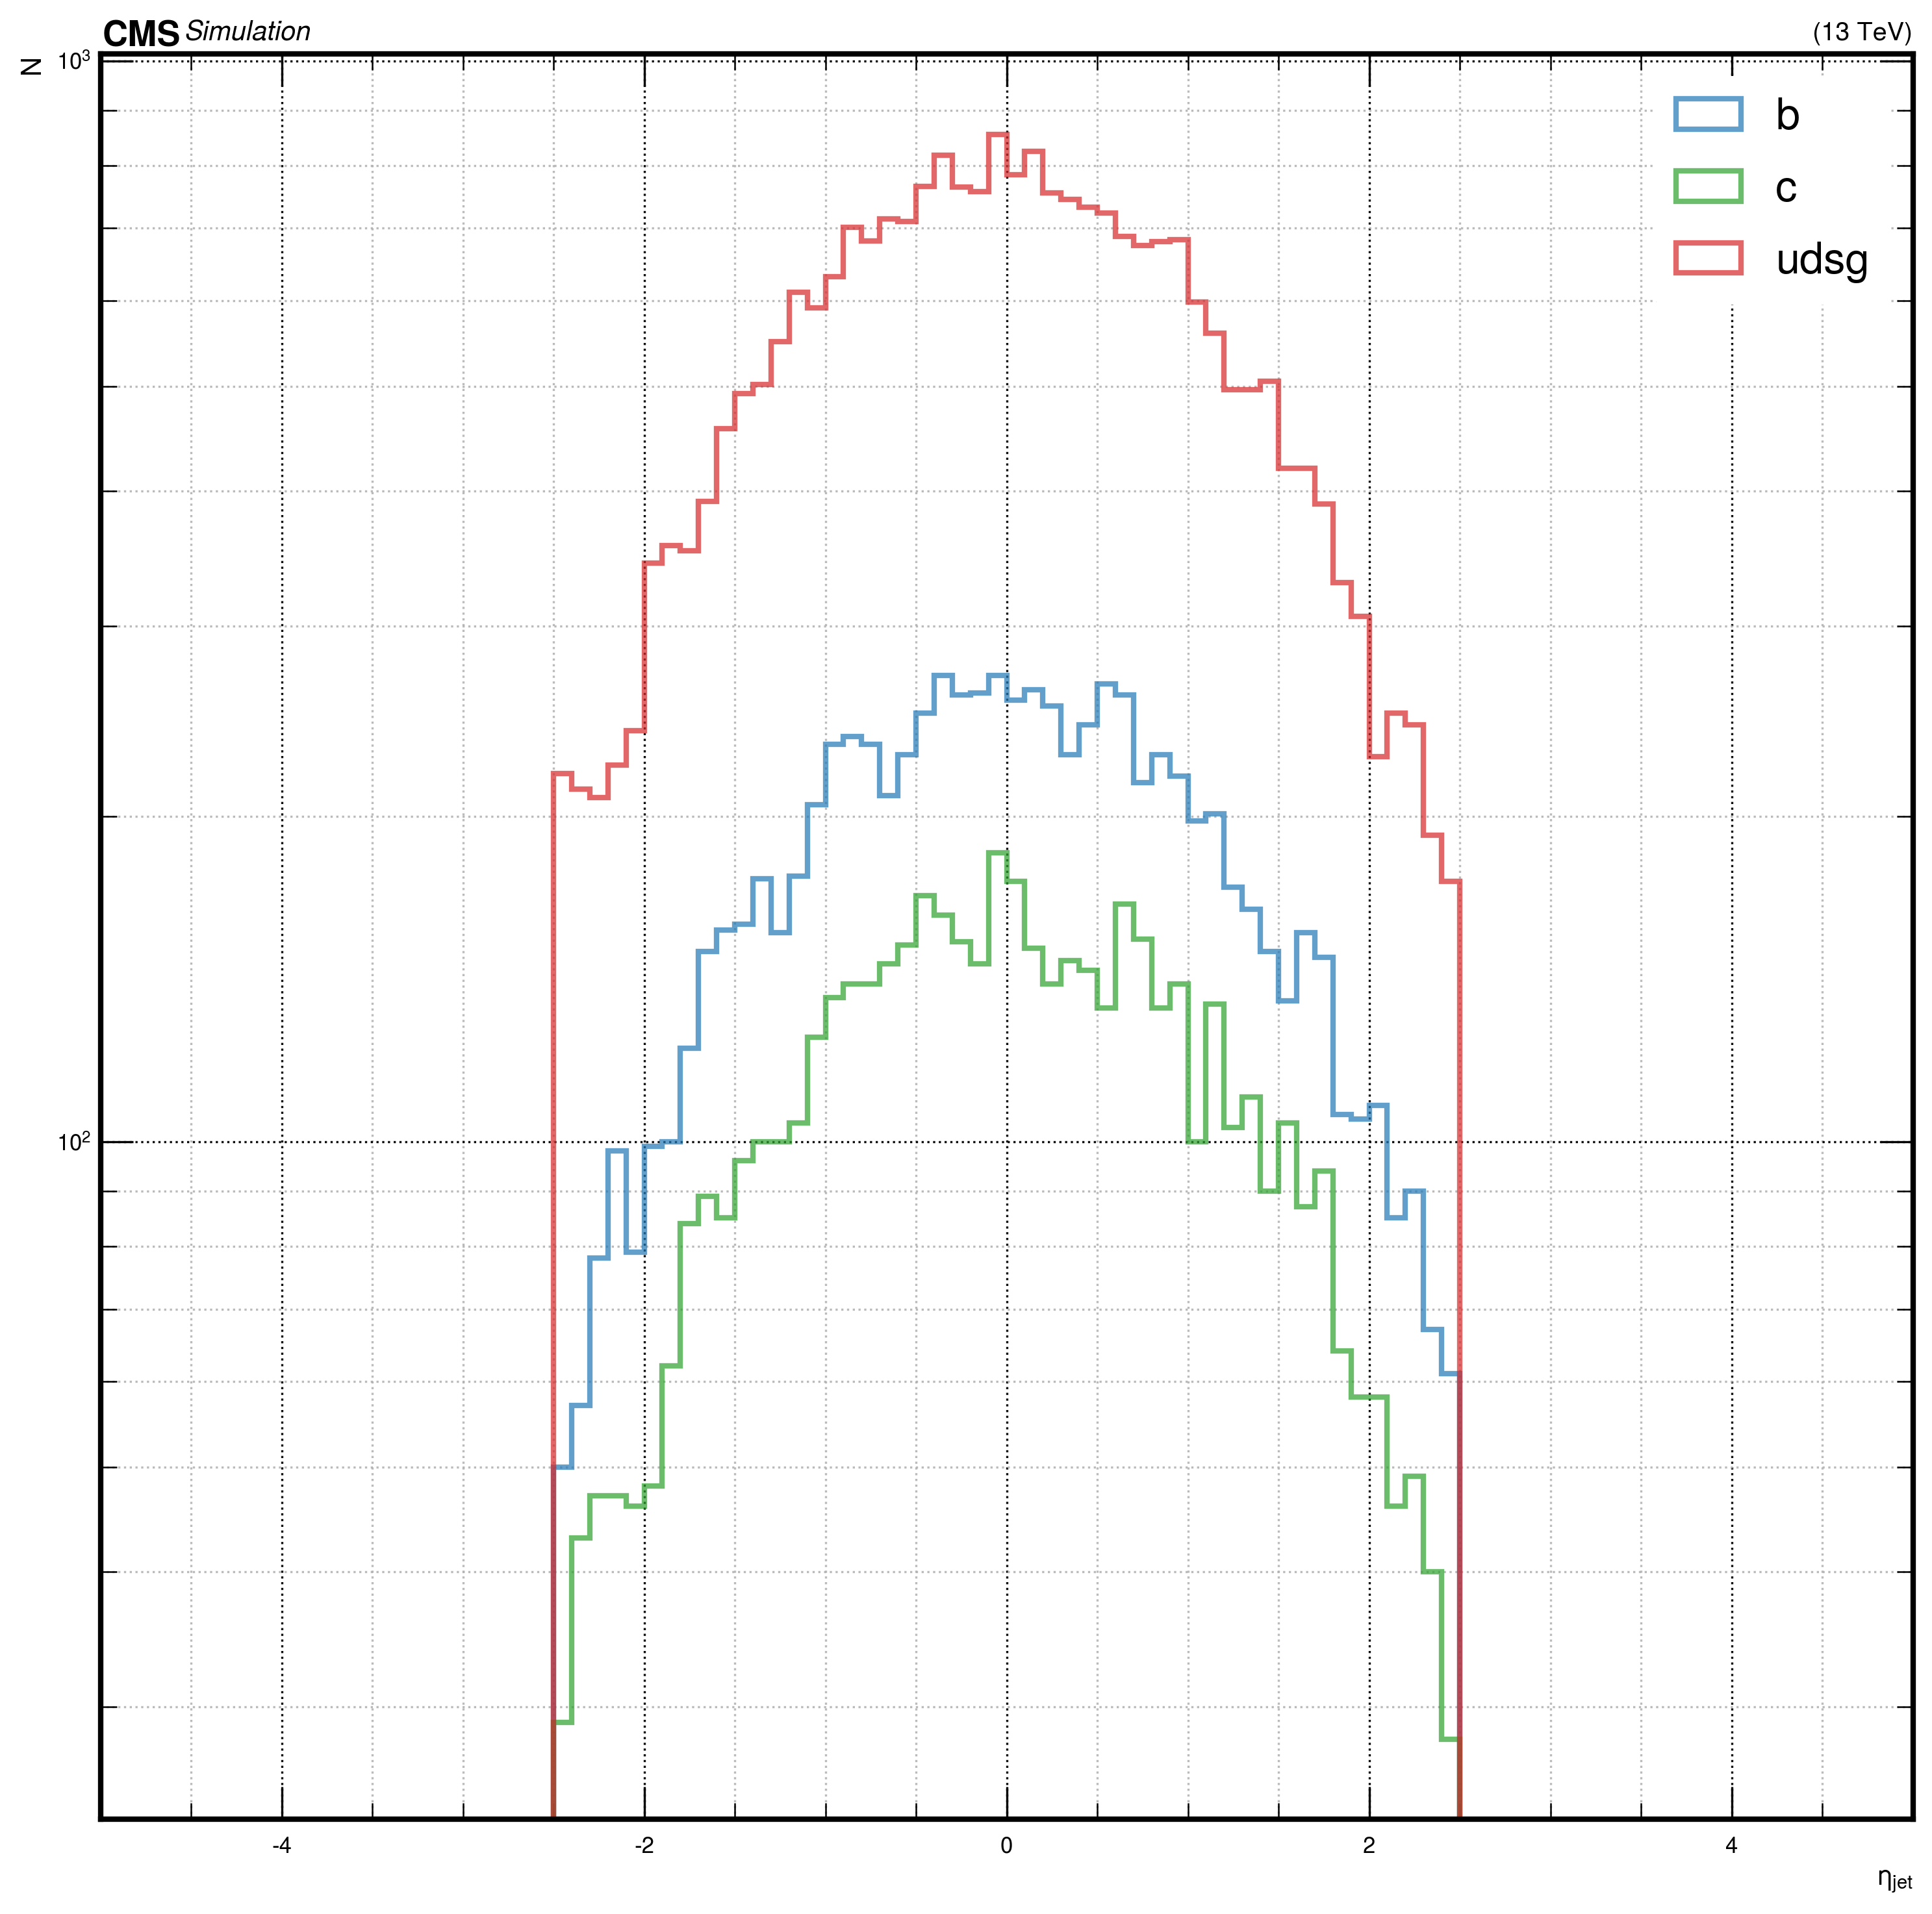

In [8]:
# plot quantities

quantities = ['jet_pt','jet_eta']
ranges = [[0,2000],[-5,5]]
Nbins = [100,100]

flavour_names = ['b','c','udsg']
flavour_ids = [1,2,3]
flavour_colors = ['tab:blue', 'tab:green', 'tab:red']
flavour = (variables[quantity_indices['isB'],:]+variables[quantity_indices['isBB'],:]+variables[quantity_indices['isLeptonicB'],:])*flavour_ids[0] + \
variables[quantity_indices['isC'],:]*flavour_ids[1] + (variables[quantity_indices['isUDS'],:]+variables[quantity_indices['isG'],:])*flavour_ids[2]

for i in range(len(quantities)):
    quantity = quantities[i]
    index = quantity_indices[quantity]
    fig,ax = plt.subplots(figsize=[12,12], dpi=300)
    ax.set_xlim(left=ranges[i][0], right=ranges[i][1])
    ax.set_yscale('log')
    ax.set_ylabel('N')
    ax.set_xlabel(quantity_labels[quantity])
    ax.grid(which='minor', alpha=0.85)
    ax.grid(which='major', alpha=0.95, color='black')
    for j in range(len(flavour_ids)):
        x = variables[index,np.where(flavour==flavour_ids[j])[0]]
        ax.hist(x, bins=Nbins[i], range=(ranges[i][0],ranges[i][1]), histtype='step', linewidth=2,
        alpha=0.7, color=flavour_colors[j], label=flavour_names[j])
    legloc = 'upper right'
    leg=ax.legend(title='',fontsize=16,title_fontsize=20,labelspacing=0.7,loc=legloc,frameon=True,framealpha=1,facecolor='white')
    if 'right' in legloc:
        aligned = 'right'
    else:
        aligned = 'left'
    leg._legend_box.align = aligned
    leg.get_frame().set_linewidth(0.0)
    hep.cms.label(rlabel='(13 TeV)')
    print('saving')
    fig.savefig('variable_plots/{}.pdf'.format(quantity))
    

<ipython-input-9-ae265e038238>:39: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  hist, xbins, ybins, im = ax.hist2d(x, y, bins=edges, norm='log')


saving


<ipython-input-9-ae265e038238>:39: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  hist, xbins, ybins, im = ax.hist2d(x, y, bins=edges, norm='log')


saving


<ipython-input-9-ae265e038238>:39: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  hist, xbins, ybins, im = ax.hist2d(x, y, bins=edges, norm='log')


saving


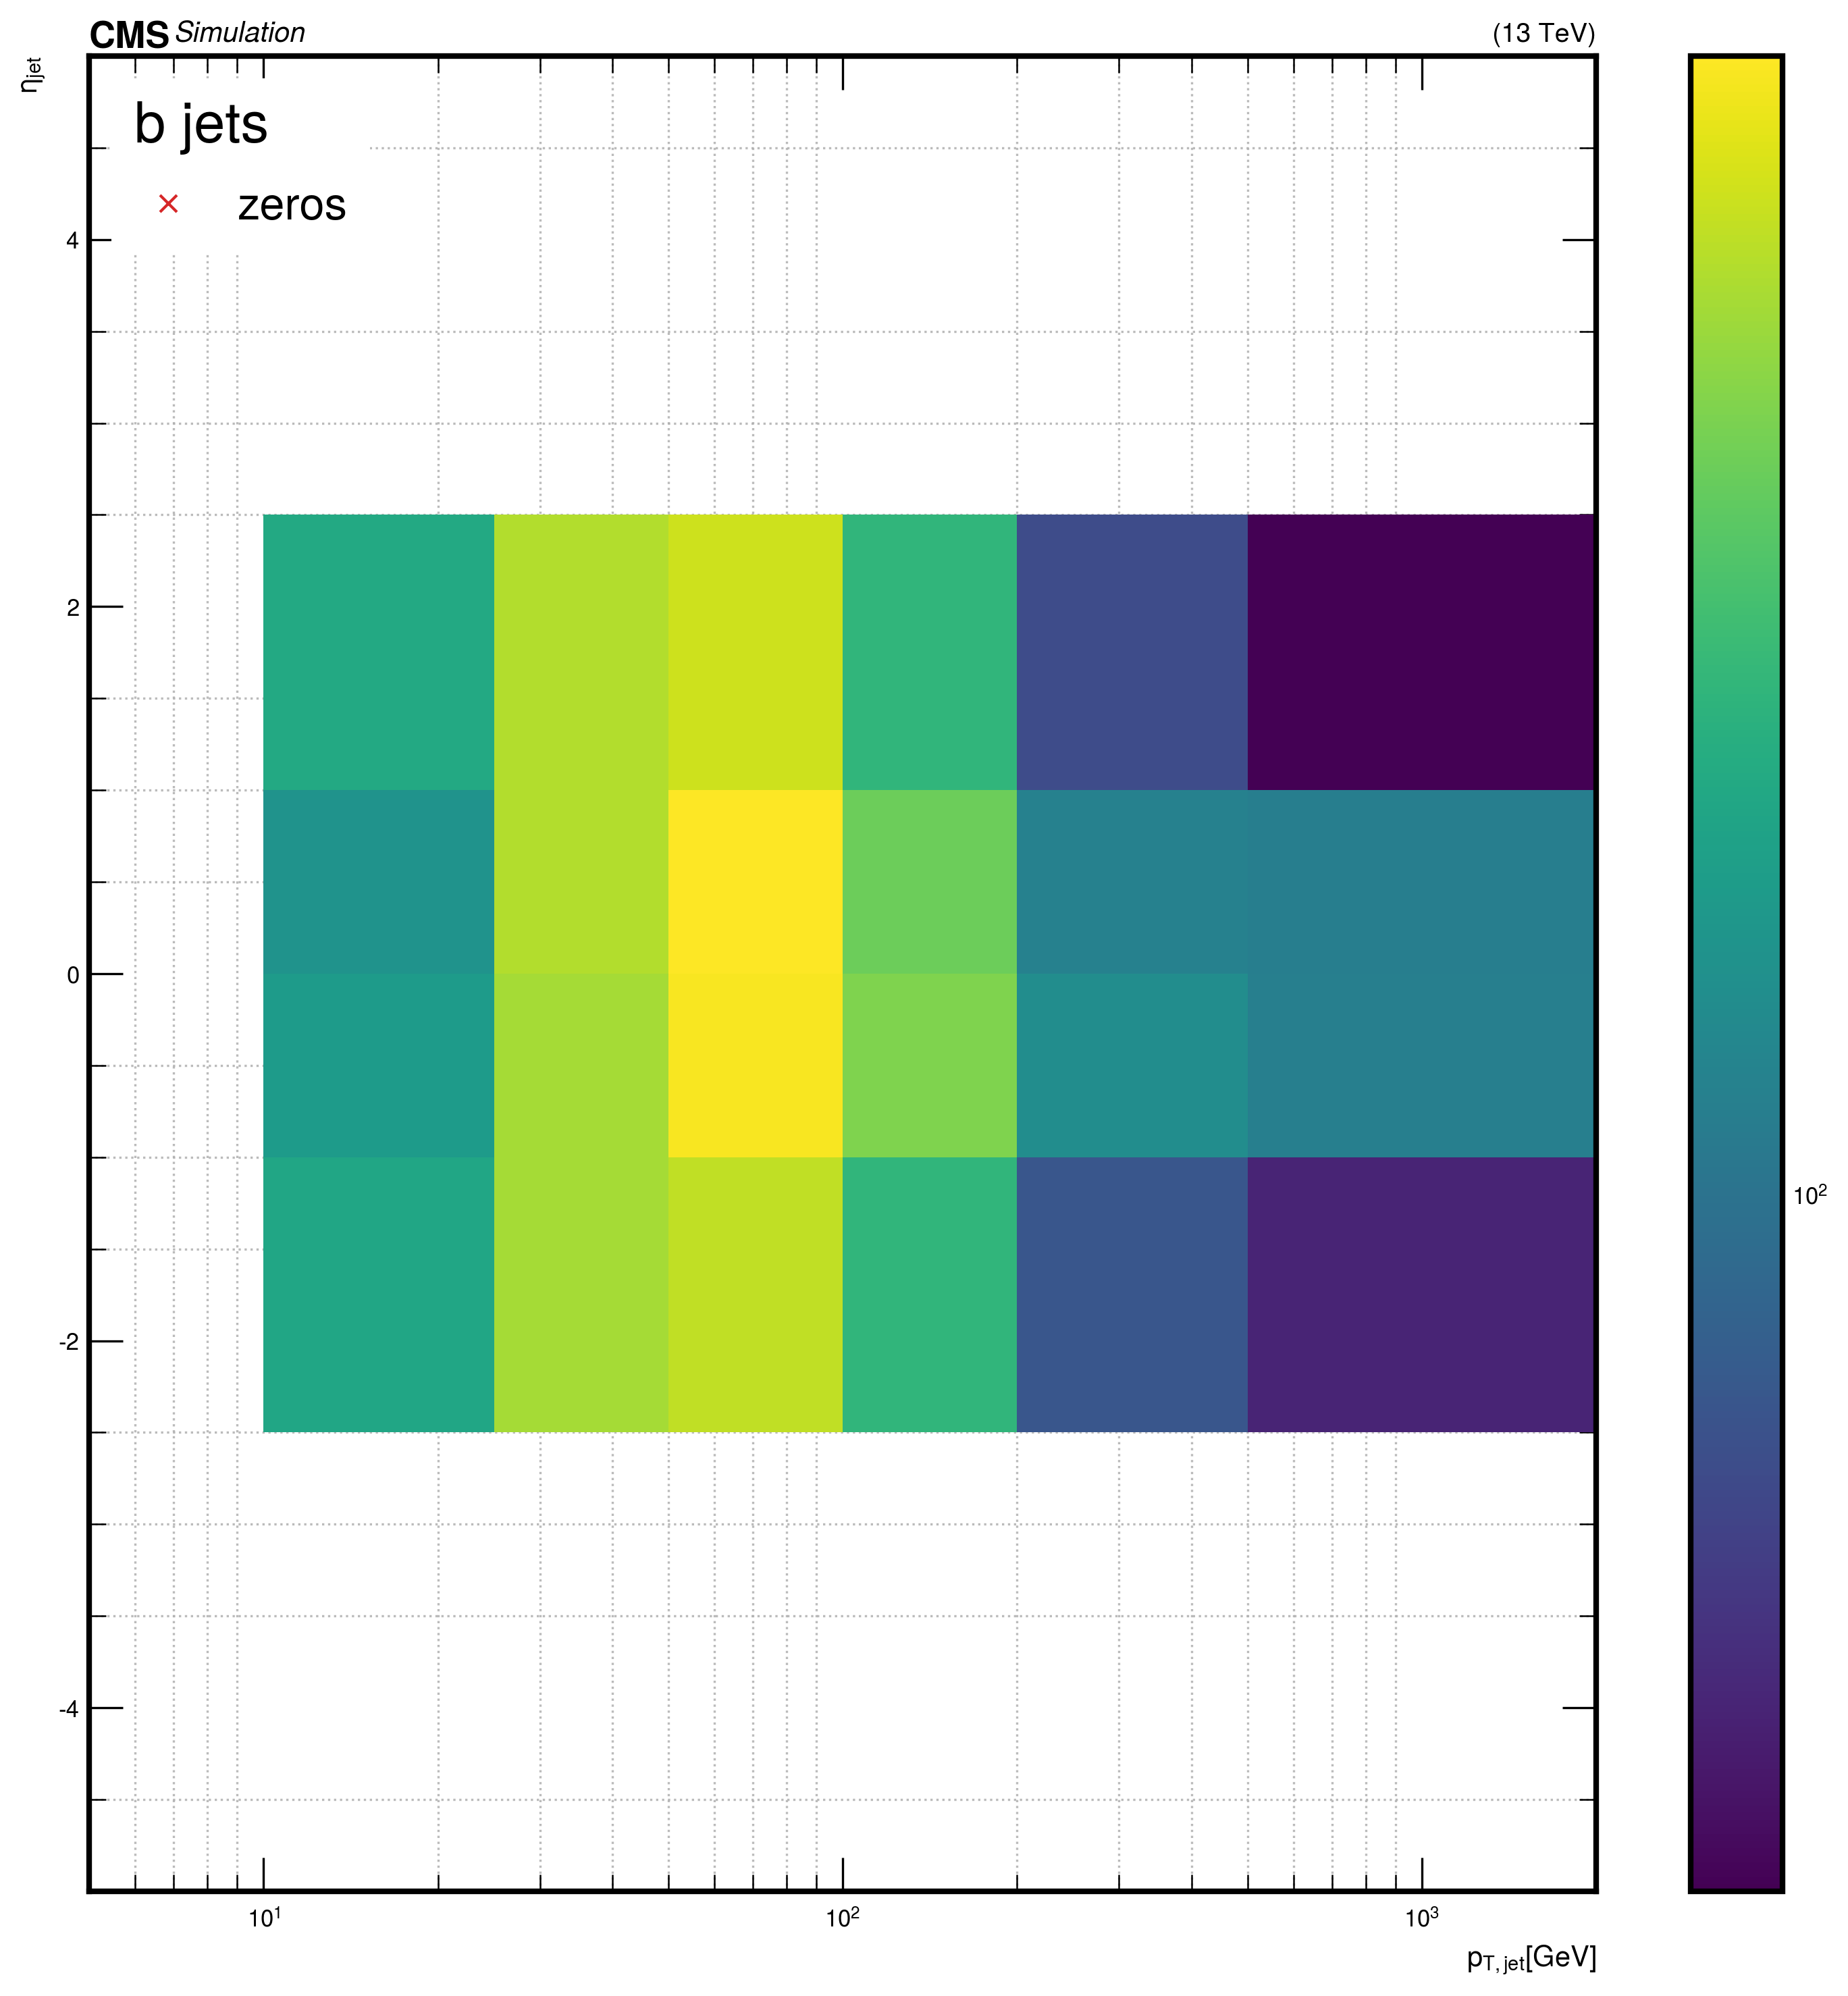

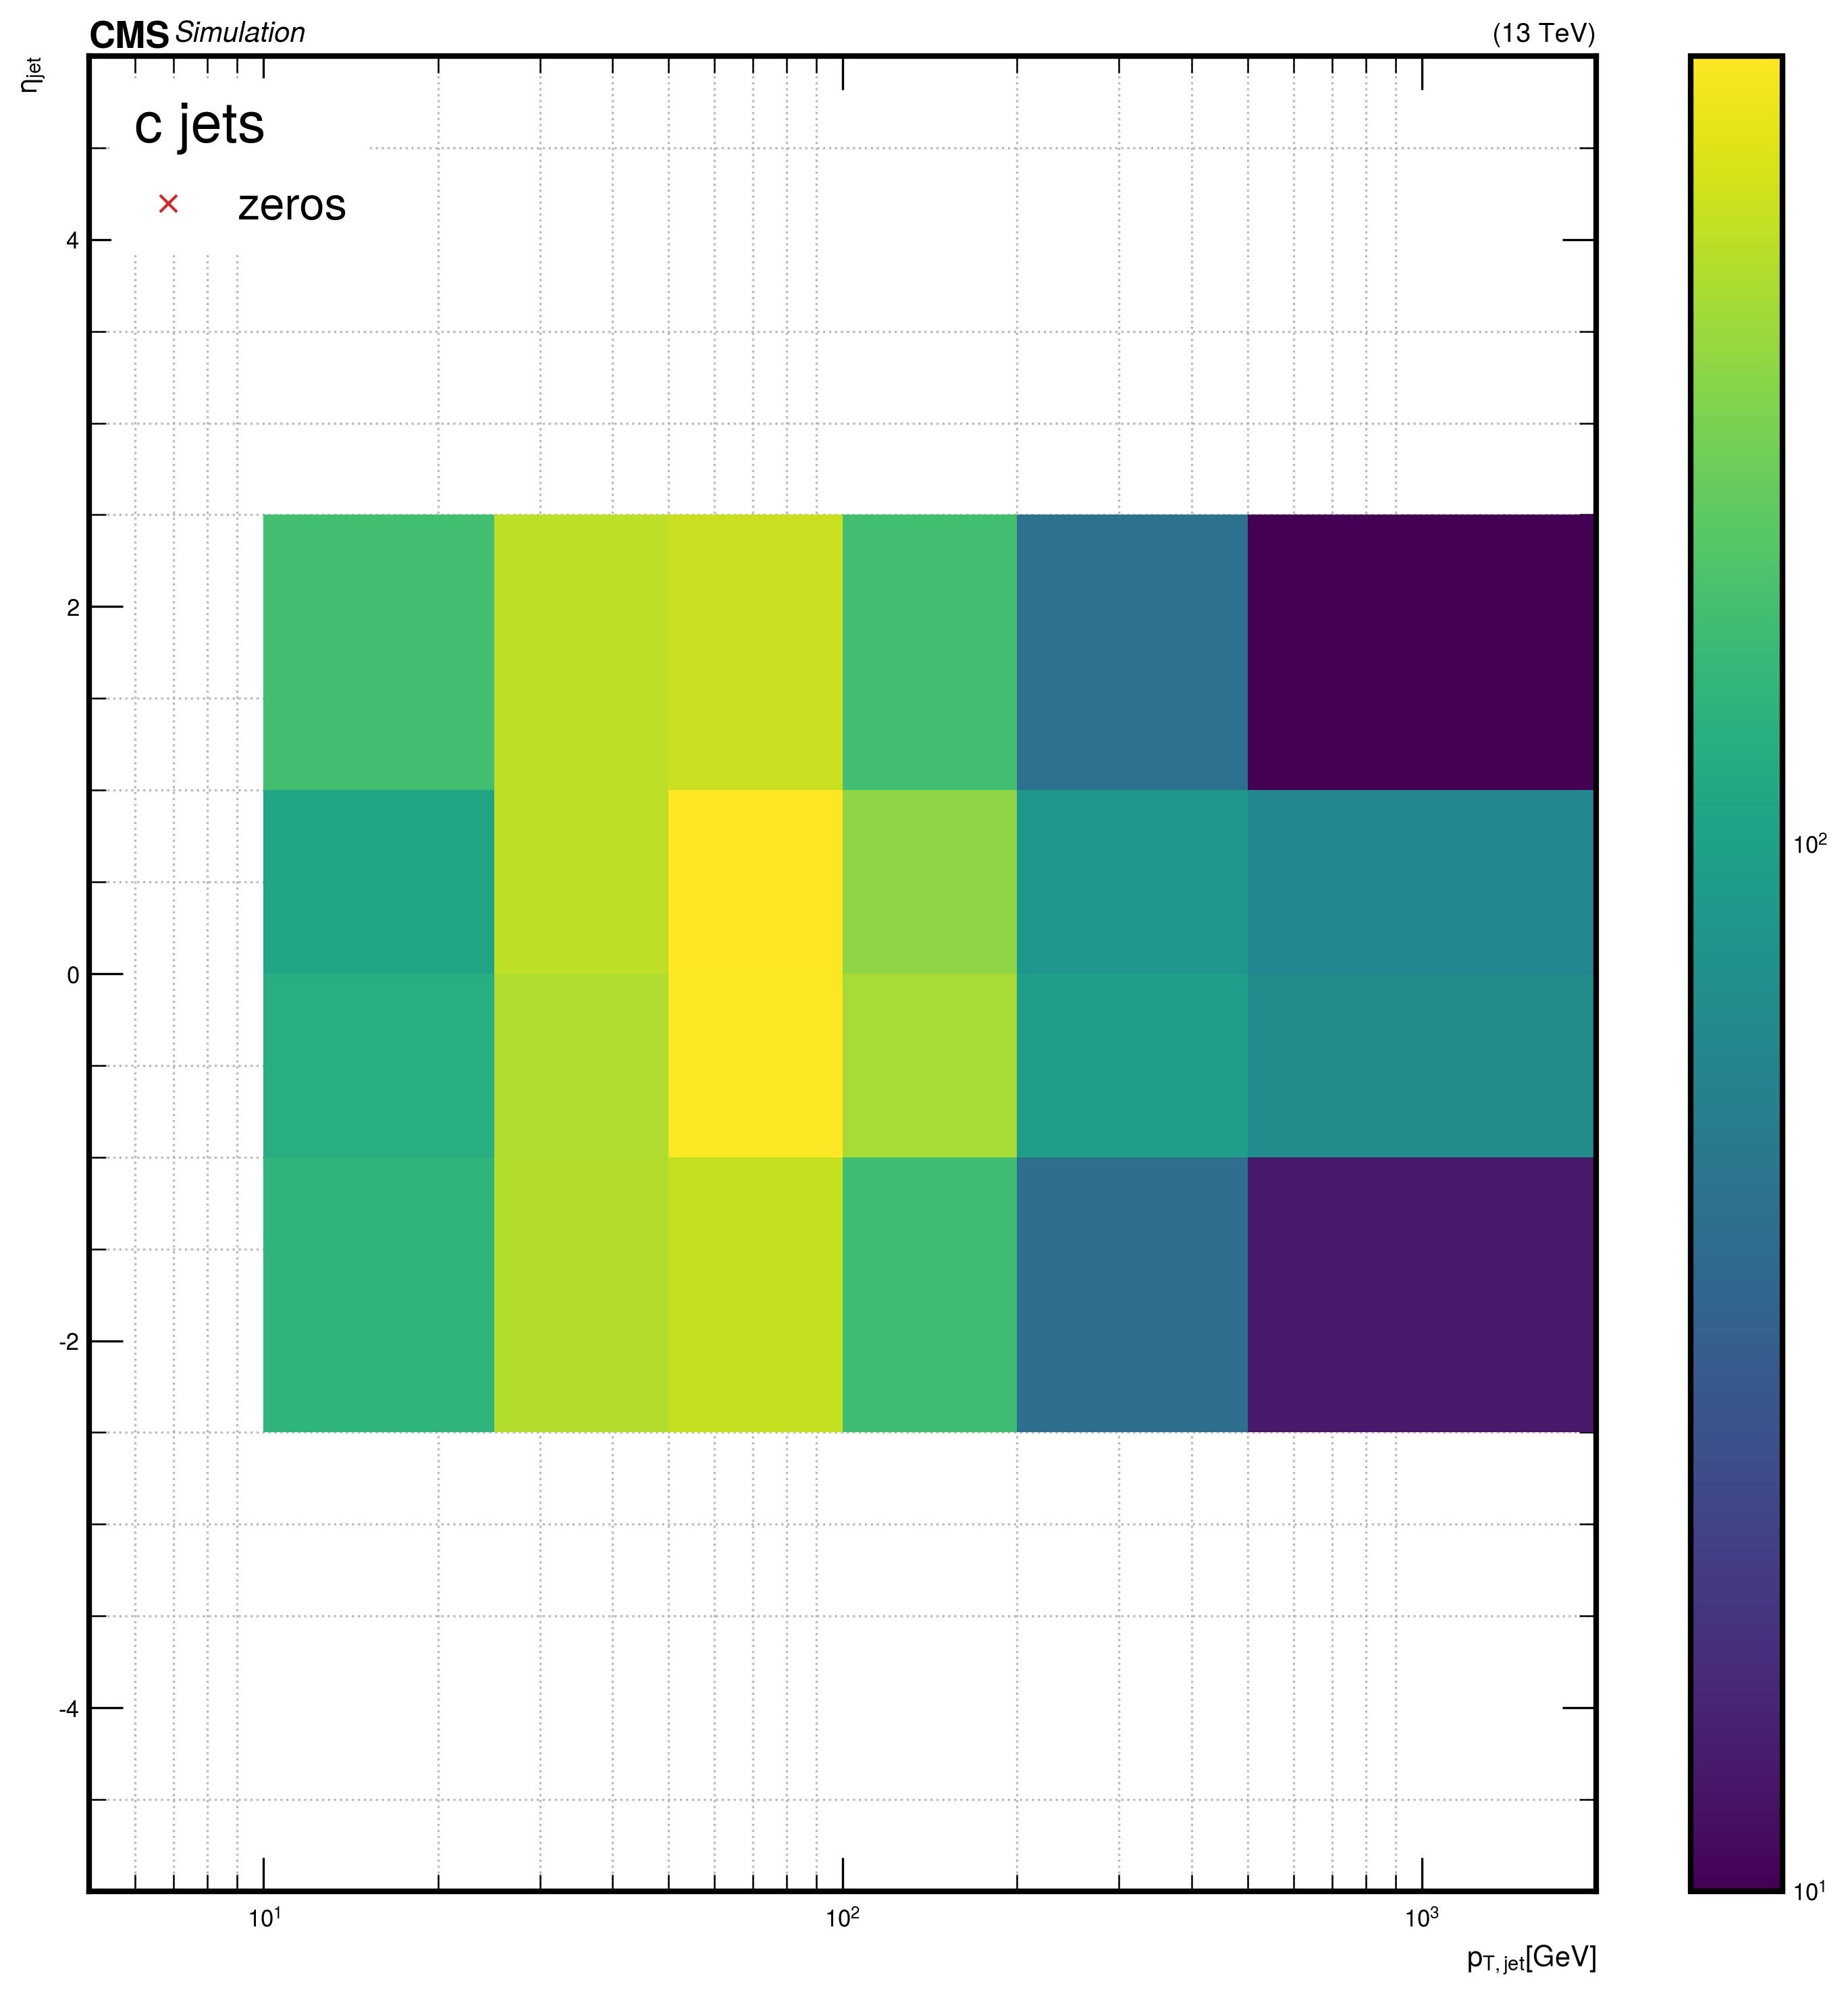

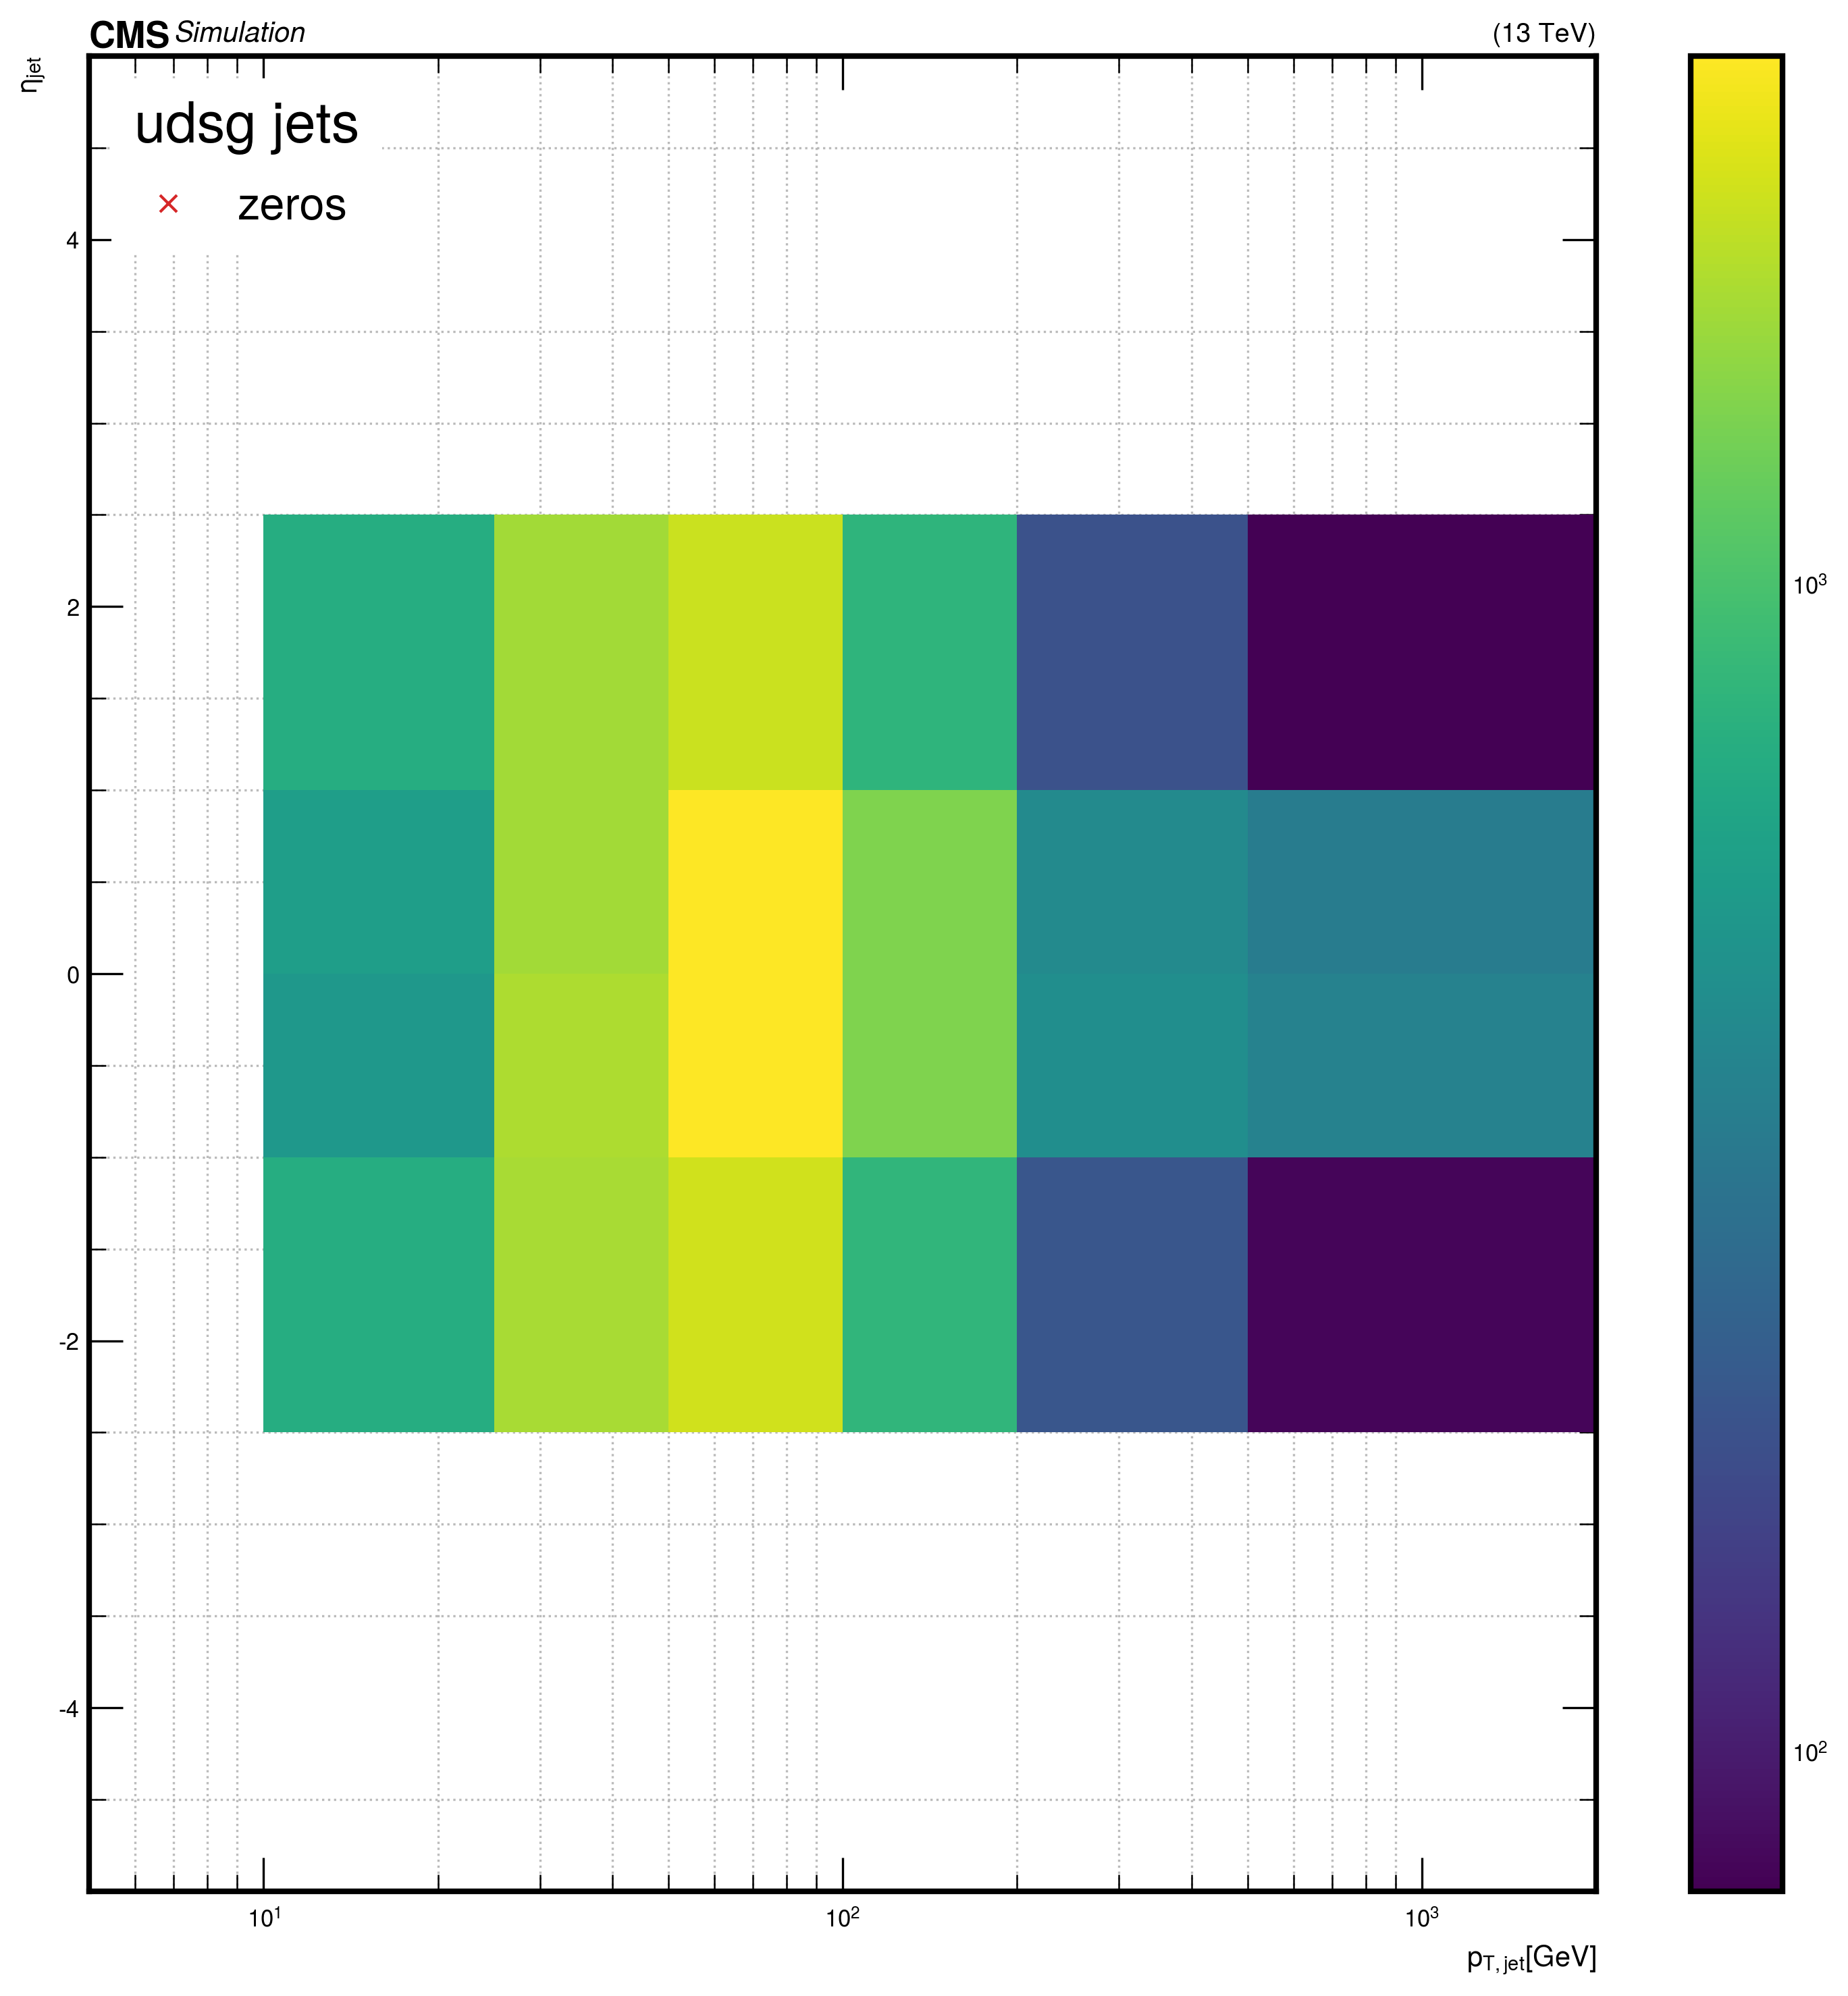

In [9]:
# plot pT-eta histograms
attack_setup = 'random'
quantities = ['jet_pt','jet_eta']
ranges = [[5,2000],[-3,3]]
Nbins = [200,100]

pt_edges=np.load('/afs/cern.ch/user/h/heschone/private/DeepJet/epsilon_tensors/{}/pt_edges.npy'.format(attack_setup))
eta_edges=np.load('/afs/cern.ch/user/h/heschone/private/DeepJet/epsilon_tensors/{}/eta_edges.npy'.format(attack_setup))
edges=[pt_edges,eta_edges]

flavour_names = ['b','c','udsg']
flavour_ids = [1,2,3]
flavour_colors = ['tab:blue', 'tab:green', 'tab:red']
flavour = (variables[quantity_indices['isB'],:]+variables[quantity_indices['isBB'],:]+variables[quantity_indices['isLeptonicB'],:])*flavour_ids[0] + \
variables[quantity_indices['isC'],:]*flavour_ids[1] + (variables[quantity_indices['isUDS'],:]+variables[quantity_indices['isG'],:])*flavour_ids[2]

zeros_x = variables[quantity_indices[quantities[0]],zeros]
zeros_y = variables[quantity_indices[quantities[1]],zeros]
zeros_flavour = flavour[zeros]

for i in range(len(flavour_names)):
    fig,ax = plt.subplots(figsize=[12,12], dpi=300)
    ax.set_xlim(left=ranges[0][0], right=ranges[0][1])
    ax.set_xscale('log')
    ax.set_ylim(bottom=ranges[1][0])
    ax.set_ylim(top=ranges[1][1])
    ax.set_ylabel(quantity_labels[quantities[1]])
    ax.set_xlabel(quantity_labels[quantities[0]])
    ax.grid(which='minor', alpha=0.85)
    ax.grid(which='major', alpha=0.95, color='black')
    
    x =  variables[quantity_indices[quantities[0]],np.where(flavour==flavour_ids[i])[0]]
    y = variables[quantity_indices[quantities[1]],np.where(flavour==flavour_ids[i])[0]]
    x_points = zeros_x[np.where(zeros_flavour==flavour_ids[i])[0]]
    y_points = zeros_y[np.where(zeros_flavour==flavour_ids[i])[0]]
    
    ax.plot(x_points, y_points, linestyle='None', marker='x', color='tab:red', label='zeros')
    hist, xbins, ybins, im = ax.hist2d(x, y, bins=edges, norm='log')
    fig.colorbar(im, ax=ax)
    legloc = 'upper left'
    leg=ax.legend(title='{} jets'.format(flavour_names[i]),fontsize=16,title_fontsize=20,labelspacing=0.7,loc=legloc,frameon=True,framealpha=1,facecolor='white')
    if 'right' in legloc:
        aligned = 'right'
    else:
        aligned = 'left'
    leg._legend_box.align = aligned
    leg.get_frame().set_linewidth(0.0)
    hep.cms.label(rlabel='(13 TeV)')
    print('saving')
    fig.savefig('variable_plots/{}_{}_pt_eta.pdf'.format(model_name,flavour_names[i]))

In [10]:
print('B ',np.min(variables[quantity_indices['prob_isB'],:]),' ',np.max(variables[quantity_indices['prob_isB'],:]))
print('BB ',np.min(variables[quantity_indices['prob_isBB'],:]),' ',np.max(variables[quantity_indices['prob_isBB'],:]))
print('LepB ',np.min(variables[quantity_indices['prob_isLeptonicB'],:]),' ',np.max(variables[quantity_indices['prob_isLeptonicB'],:]))
print('C ',np.min(variables[quantity_indices['prob_isC'],:]),' ',np.max(variables[quantity_indices['prob_isC'],:]))
print('UDS ',np.min(variables[quantity_indices['prob_isUDS'],:]),' ',np.max(variables[quantity_indices['prob_isUDS'],:]))
print('G ',np.min(variables[quantity_indices['prob_isG'],:]),' ',np.max(variables[quantity_indices['prob_isG'],:]))


B  -2.8477578   192.50475
BB  -10.045298   451.32388
LepB  -4.6275077   90.777565
C  -200.93729   3.371125
UDS  -213.30188   3.2178178
G  -271.68262   3.5549269


In [11]:
# investigate high prob_isG jets
high_output = np.where(variables[quantity_indices['prob_isG'],:]>300)[0]
high_output_true = np.zeros(len(high_output))
for i in high_output:
    if variables[quantity_indices['isG'],i]==1:
        j=np.where(high_output==i)
        high_output_true[j] = high_output[j]

if len(zeros)==len(high_output_true[high_output_true!=0]) and len(zeros)>0:
    n = np.sum(zeros==high_output_true[high_output_true!=0])
    if n==len(zeros):
        print('All zero gradient jets are explained by high prob_isG outputs for isG jets')
        
print(zeros)
print(high_output)
#print(high_output_true)


[]
[]


[0.0055991  0.         0.00578292 0.00795304 0.02061301 0.01243363]
[ 6251.   183.  2248.  5281. 11158. 14879.]


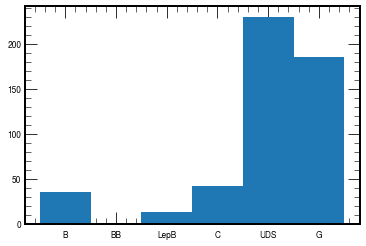

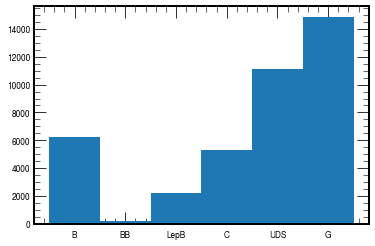

In [12]:
# investigate high prob_isBB outputs
high_output = np.where(variables[quantity_indices['prob_isBB'],:]>300)[0]
high_output_true = np.zeros(len(high_output))
for i in high_output:
    if variables[quantity_indices['isBB'],i]==1:
        j=np.where(high_output==i)
        high_output_true[j] = high_output[j]

if len(high_output_true[high_output_true!=0])>0:
    print('There are {} isBB jets with high prob_isBB output'.format(len(high_output_true[high_output_true!=0])))

#print(zeros)
#print(high_output)
#print(high_output_true)

high_output_flavour = np.zeros(len(high_output))
for i in range(len(high_output)):
    high_output_flavour[i]=np.argmax(variables[quantity_indices['isB']:quantity_indices['isB']+6,high_output[i]])+1   
plt.figure()
bins1, edges1, dummy1 = plt.hist(high_output_flavour, range=(0.5,6.5), bins=6)
plt.xticks(ticks=[1,2,3,4,5,6],labels=['B','BB','LepB','C','UDS','G'])
plt.savefig('variable_plots/{}_high_output.pdf'.format(model_name))

truth_flavour = np.zeros(len(variables[quantity_indices['isB'],:]))
for i in range(len(truth_flavour)):
    truth_flavour[i]=np.argmax(variables[quantity_indices['isB']:quantity_indices['isB']+6,i])+1   
plt.figure()
bins2, edges2, dummy2 = plt.hist(truth_flavour, range=(0.5,6.5), bins=6)
plt.xticks(ticks=[1,2,3,4,5,6],labels=['B','BB','LepB','C','UDS','G'])
plt.savefig('variable_plots/{}_high_output.pdf'.format(model_name))

print(bins1/bins2)
print(bins2)

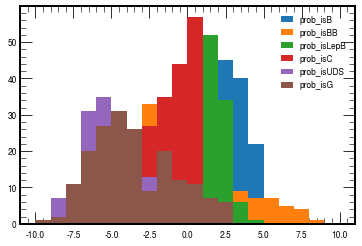

In [13]:
indices = np.where(variables[quantity_indices['isBB']]>0)[0]
x = variables[quantity_indices['prob_isB']:quantity_indices['prob_isB']+6,indices]
plt.figure()
plt.hist(x[0],range=(-10,10),bins=20,label='prob_isB')
plt.hist(x[1],range=(-10,10),bins=20,label='prob_isBB')
plt.hist(x[2],range=(-10,10),bins=20,label='prob_isLepB')
plt.hist(x[3],range=(-10,10),bins=20,label='prob_isC')
plt.hist(x[4],range=(-10,10),bins=20,label='prob_isUDS')
plt.hist(x[5],range=(-10,10),bins=20,label='prob_isG')
plt.legend()
plt.show()

saving
saving
saving
saving
saving
saving


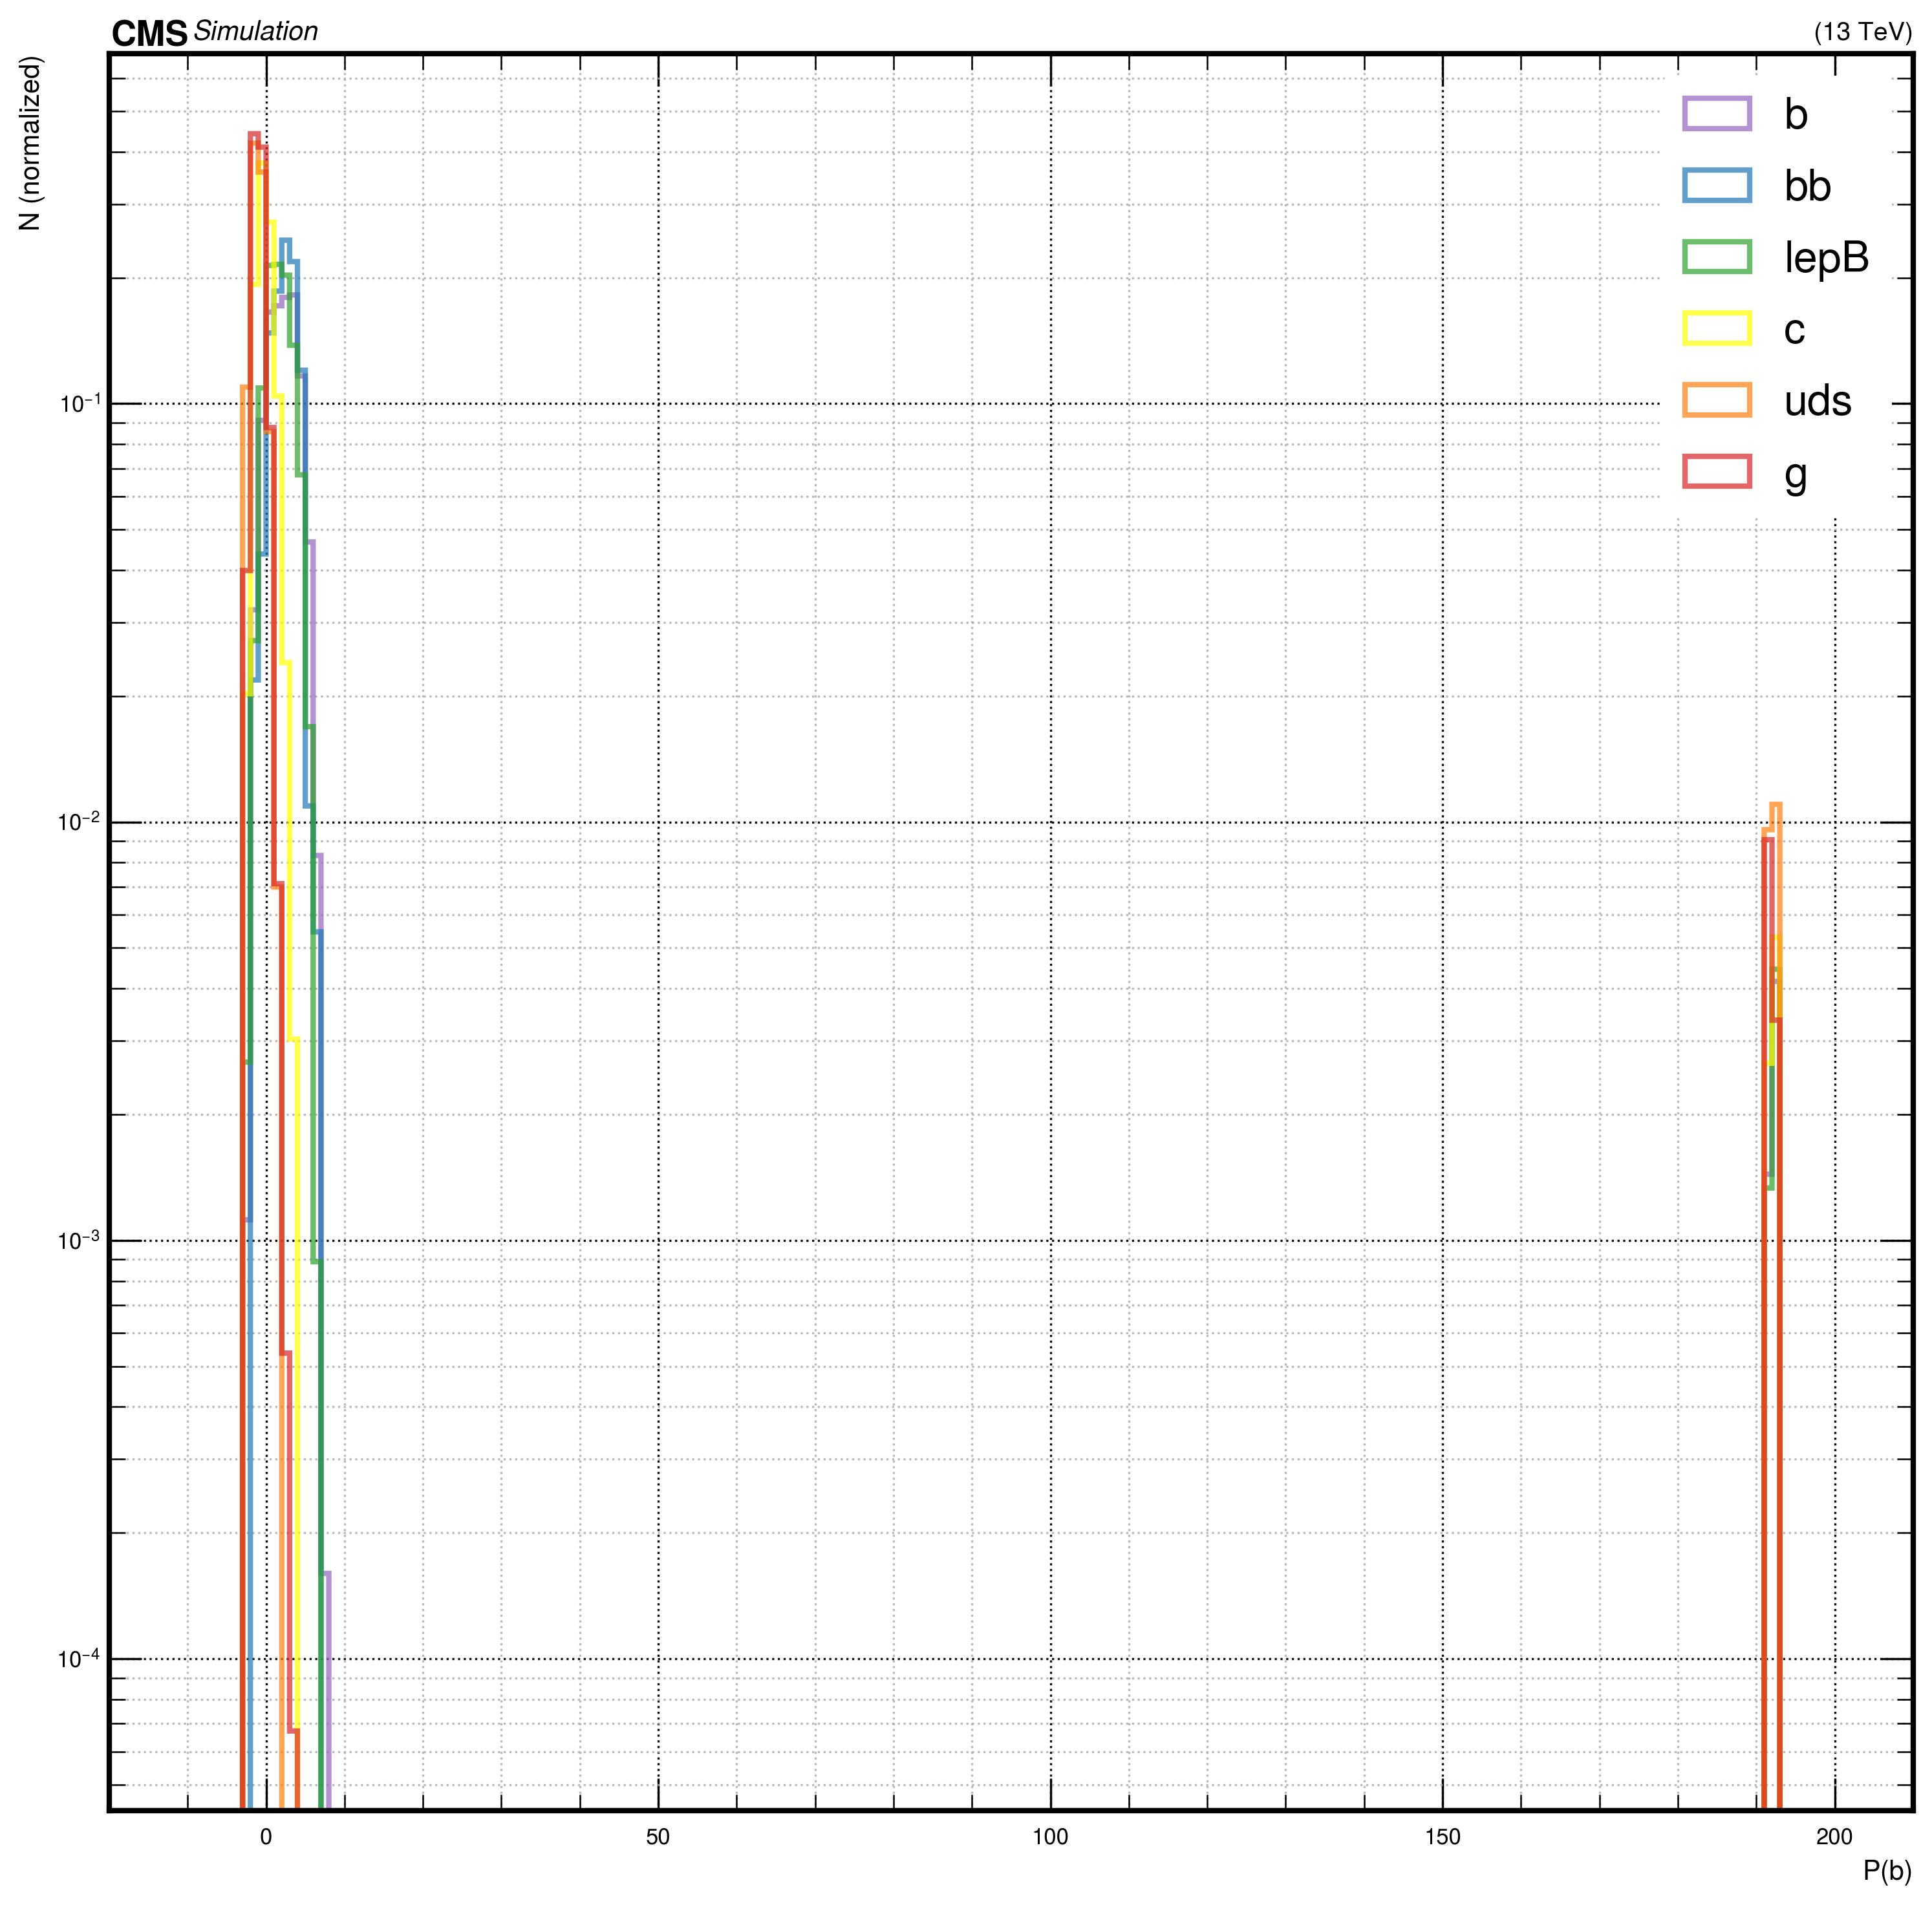

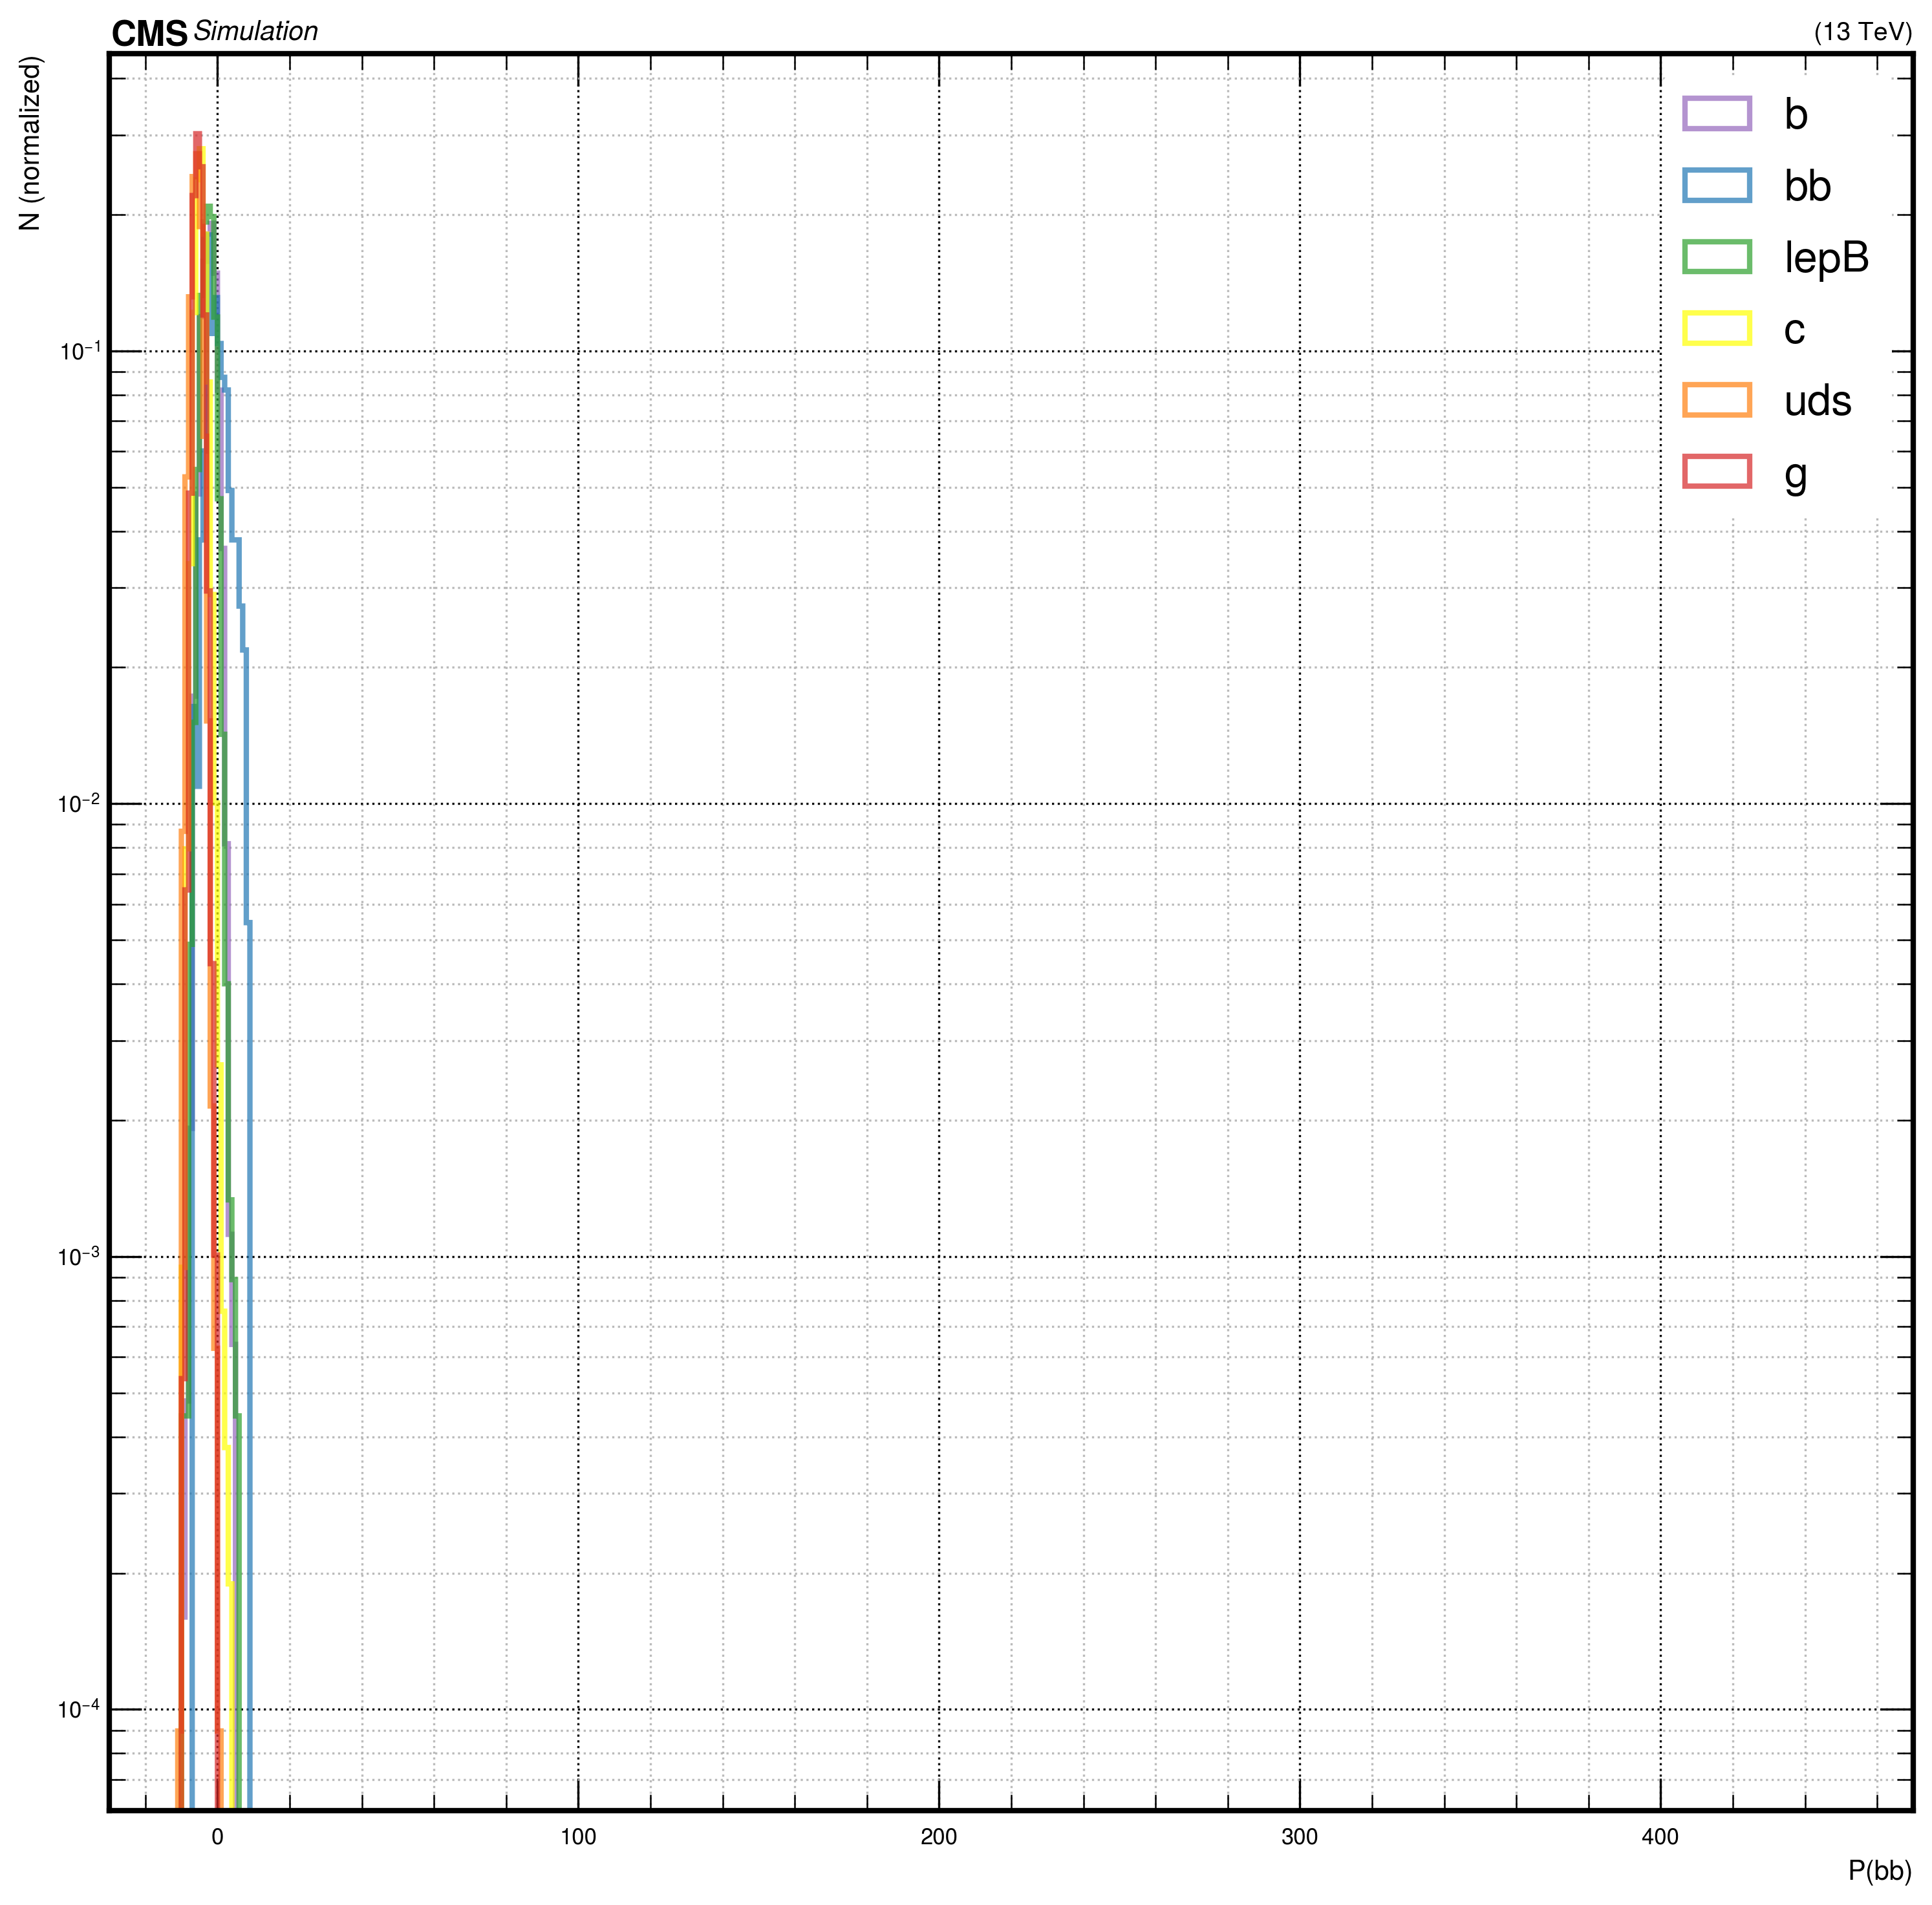

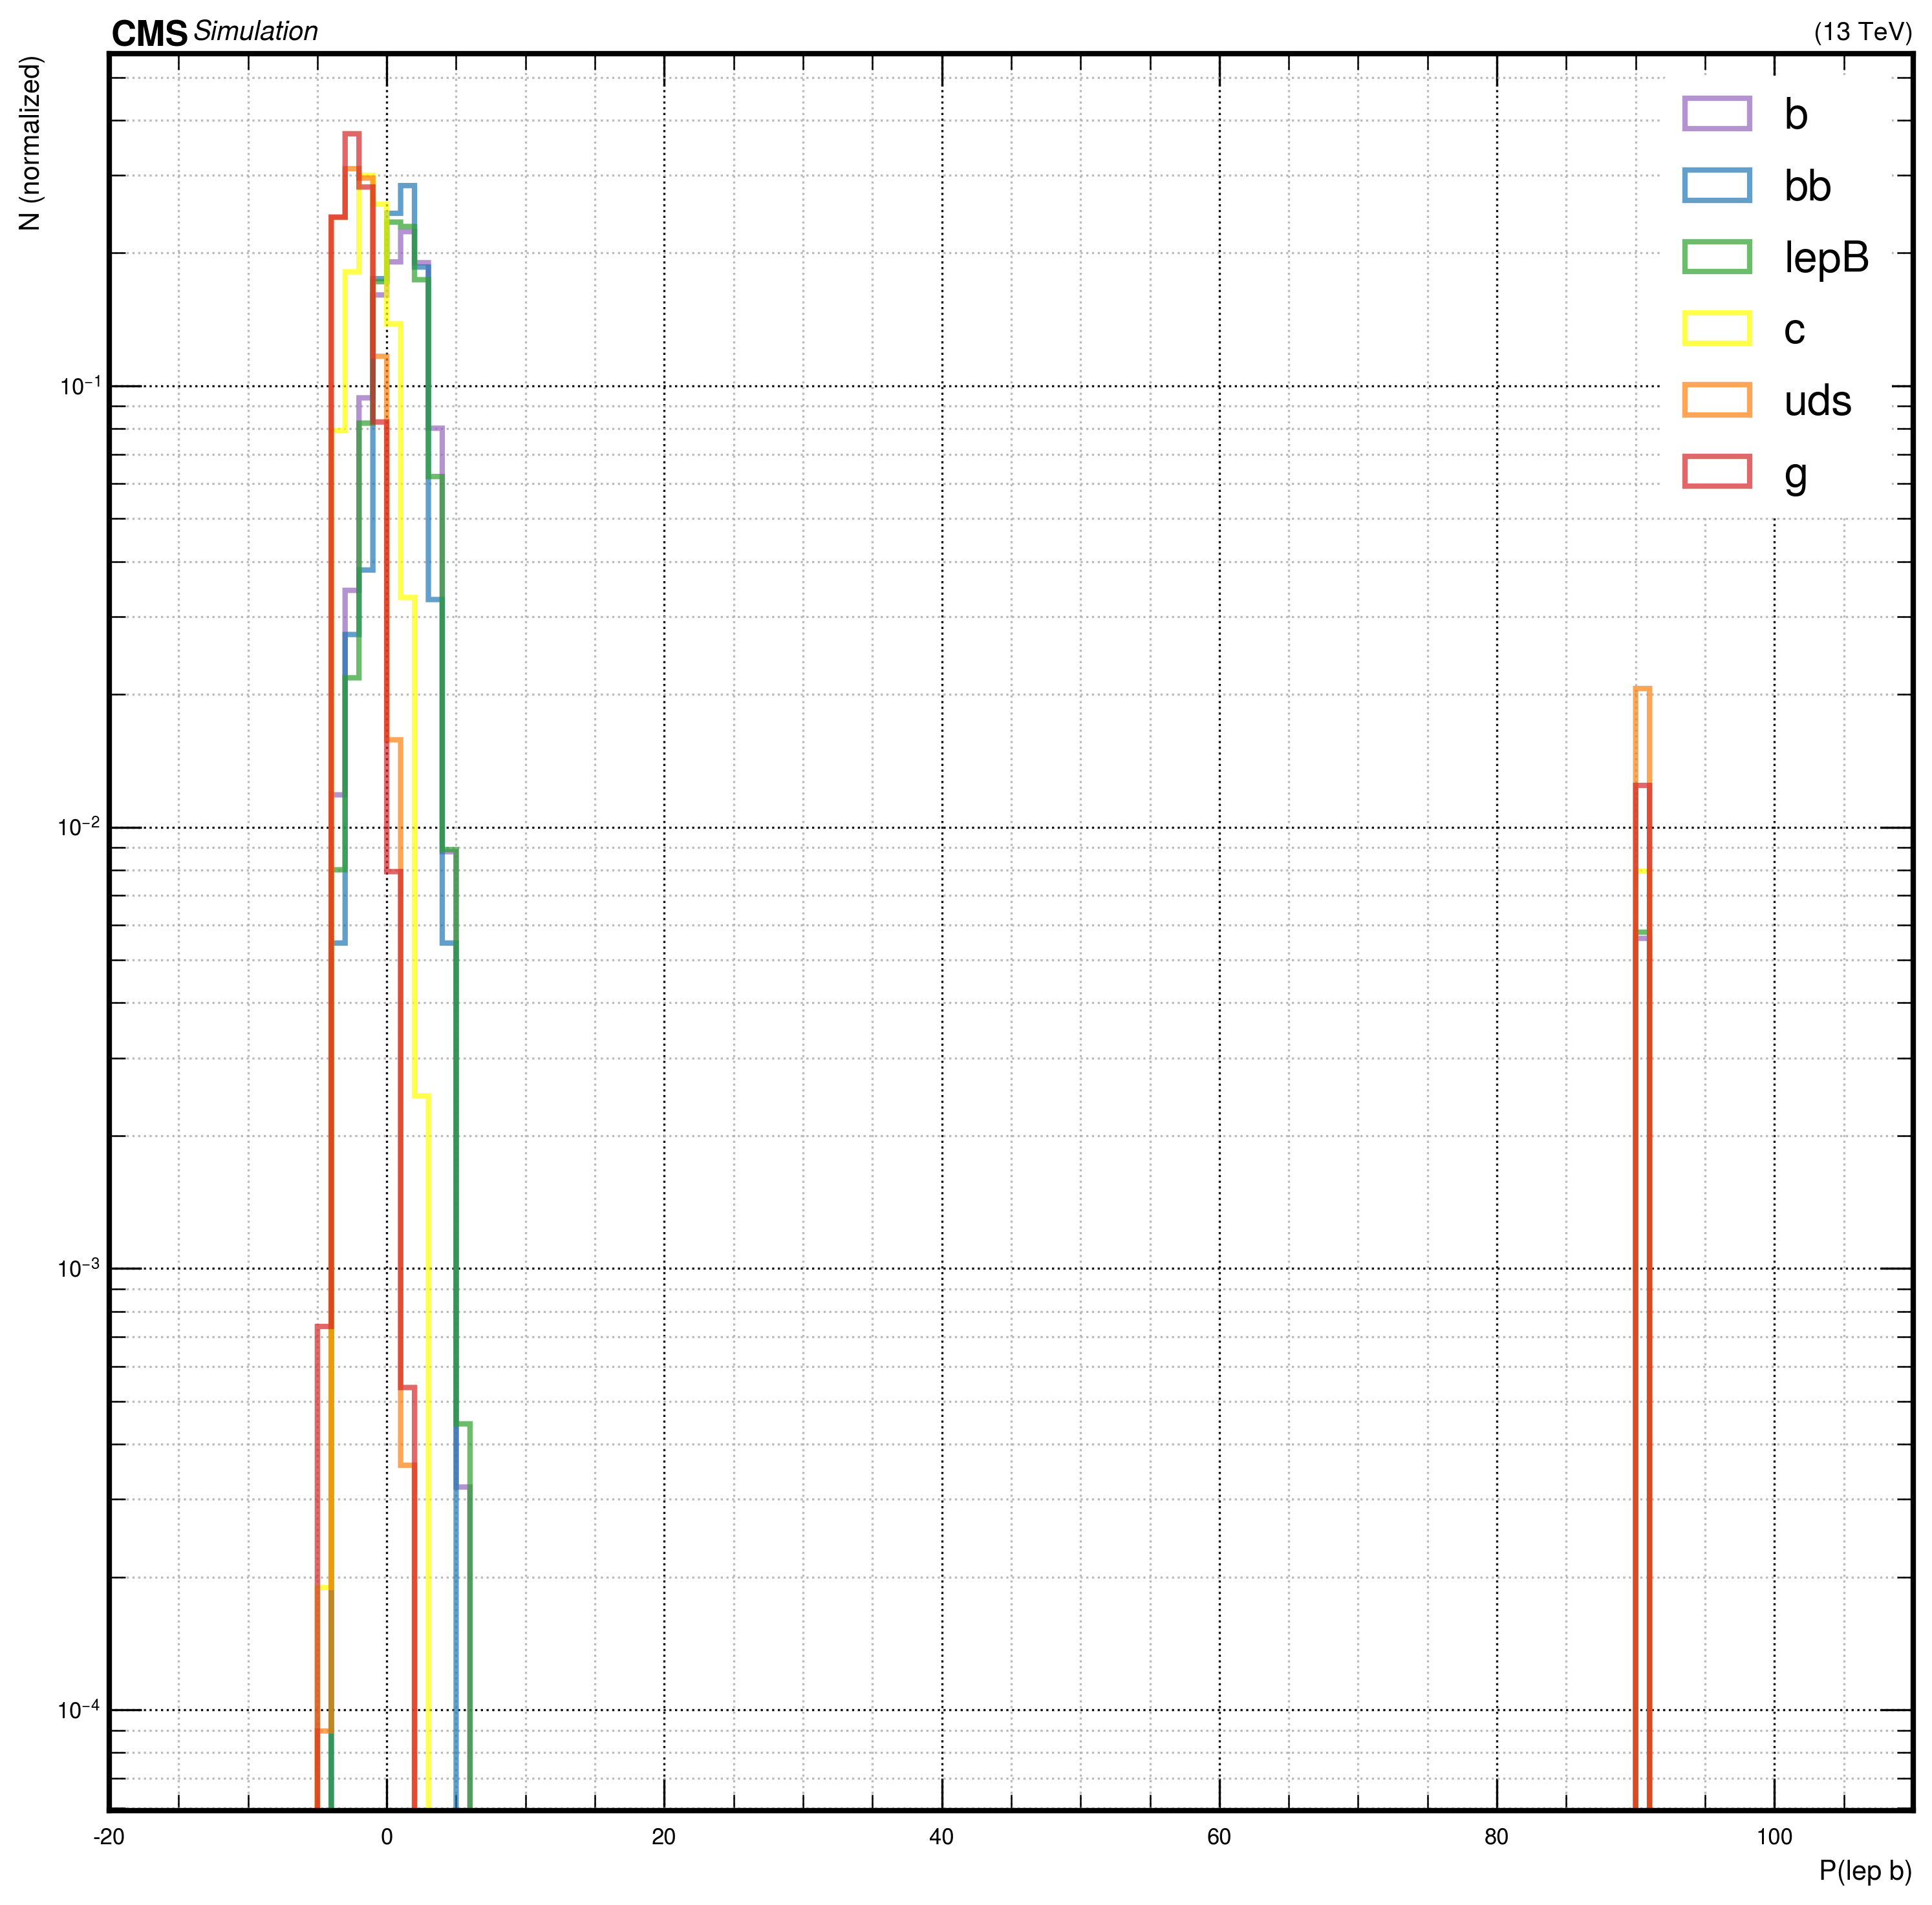

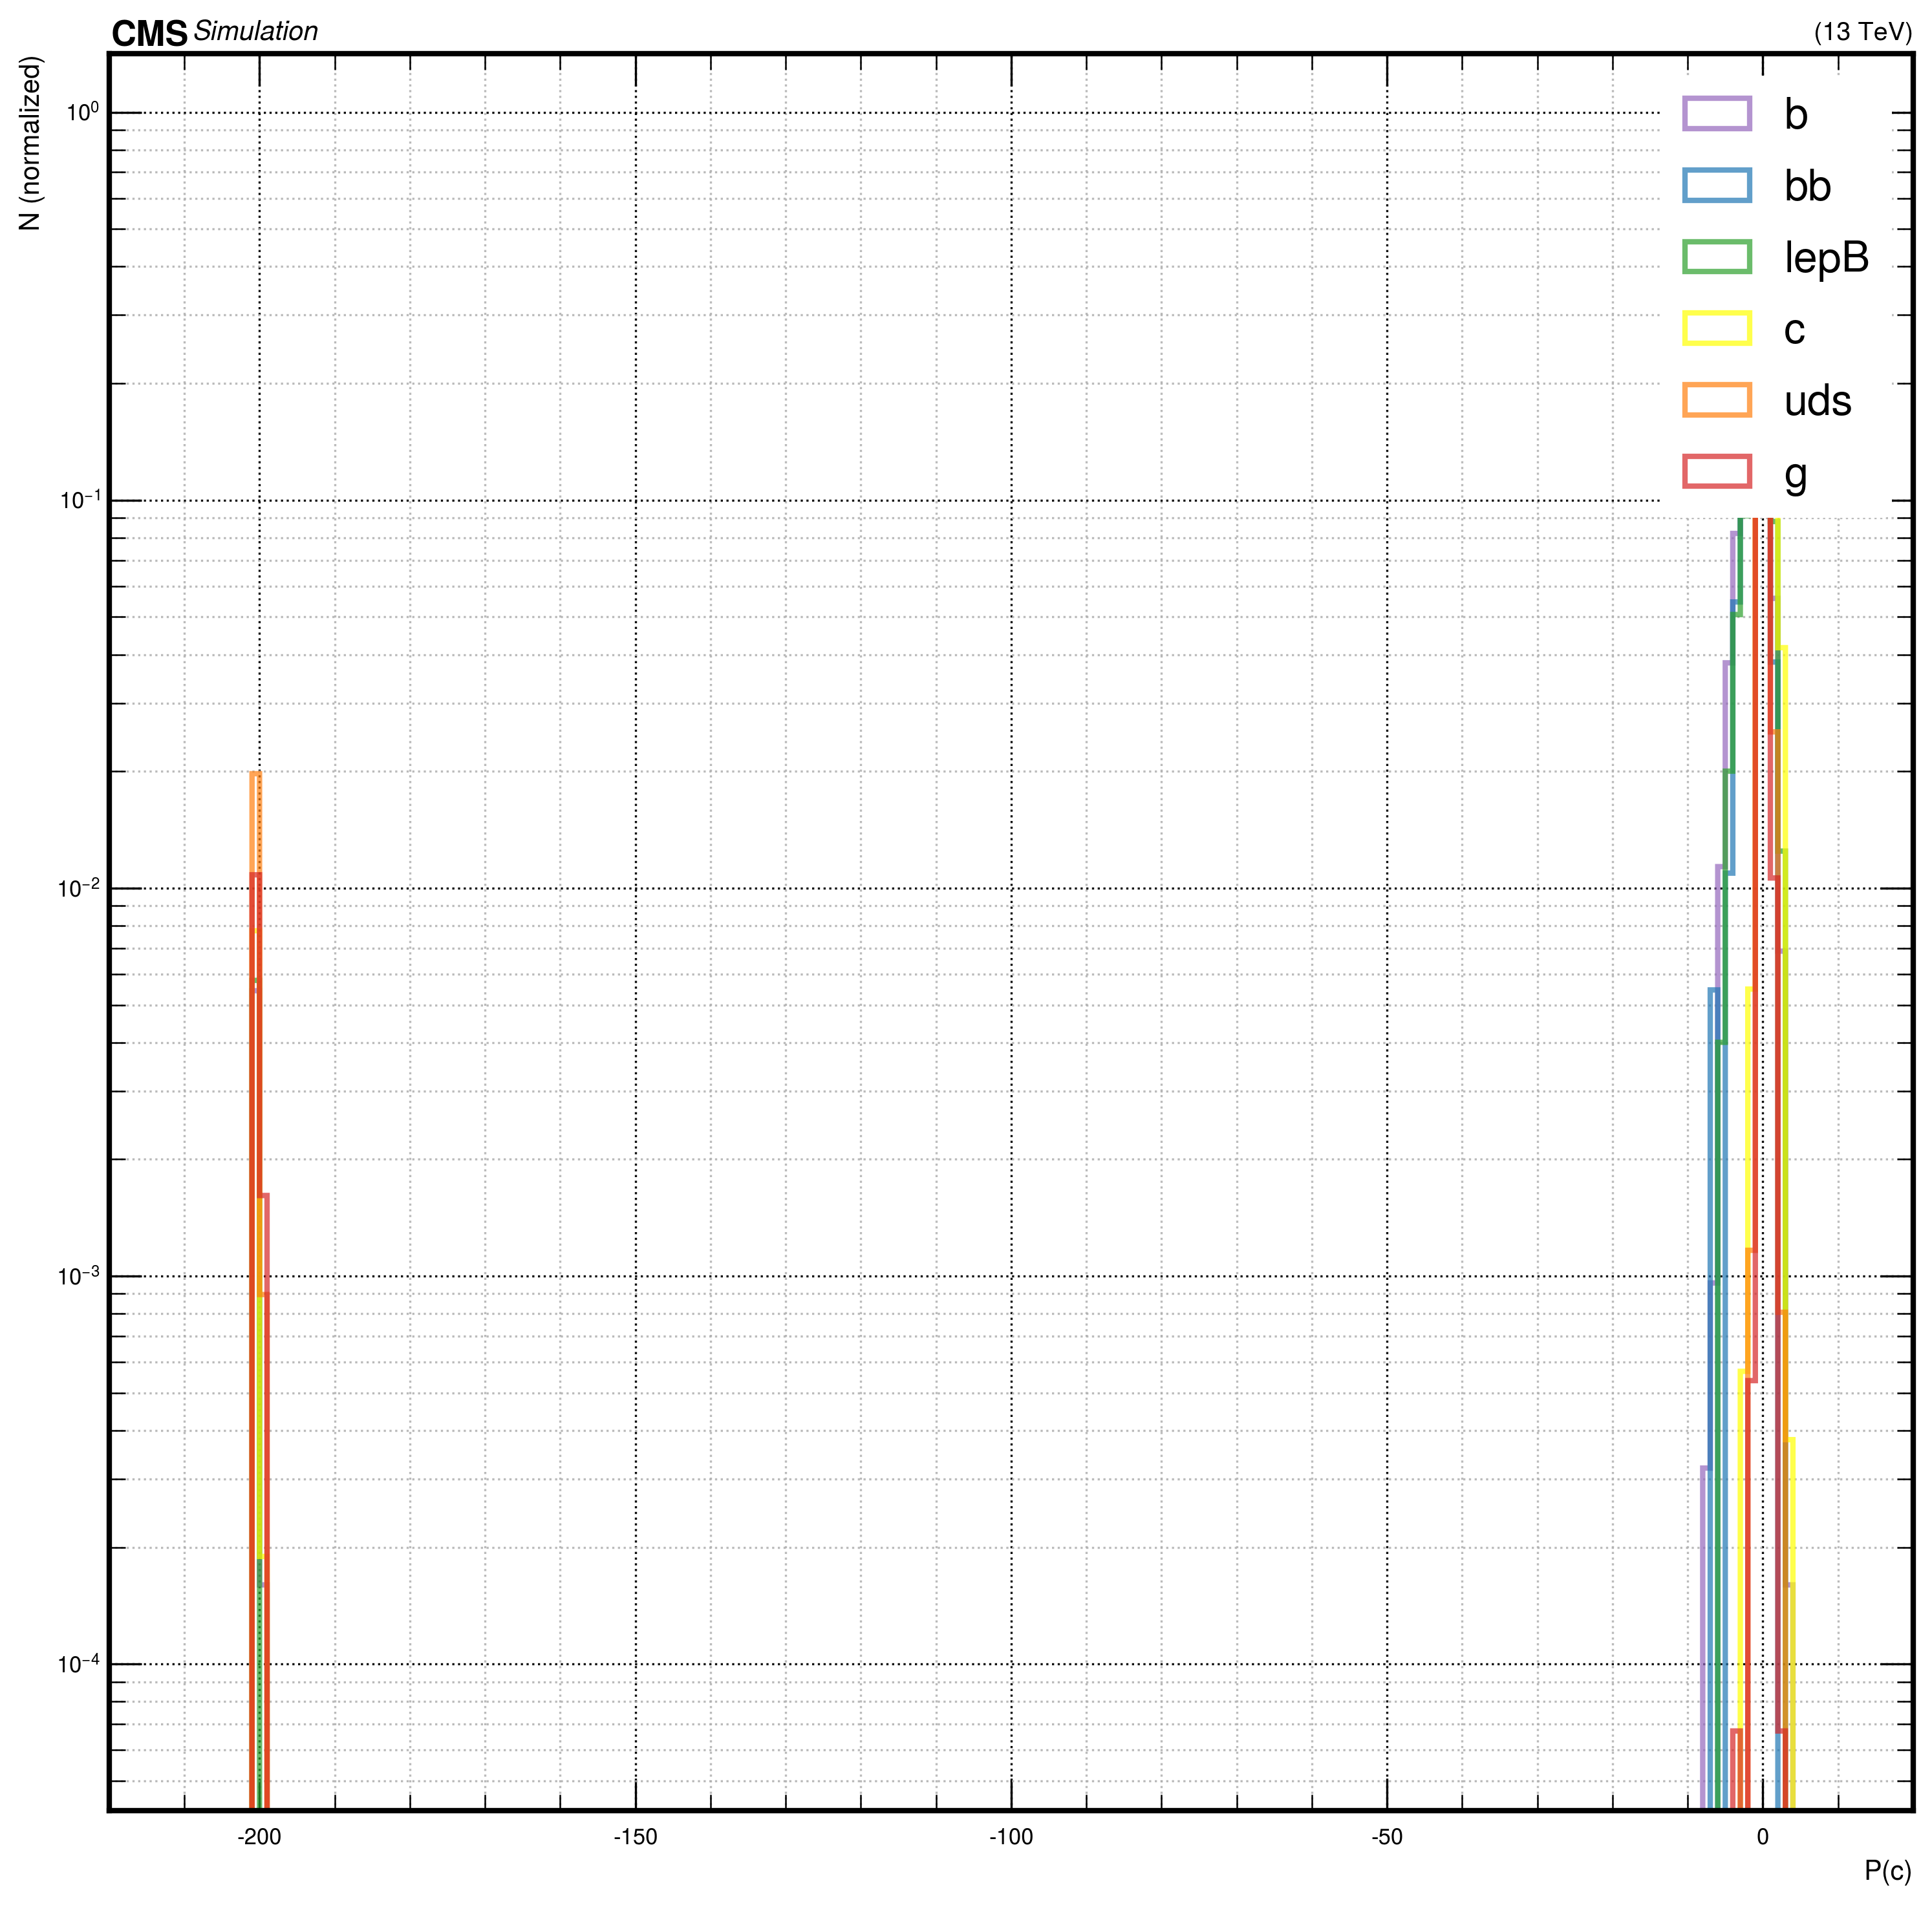

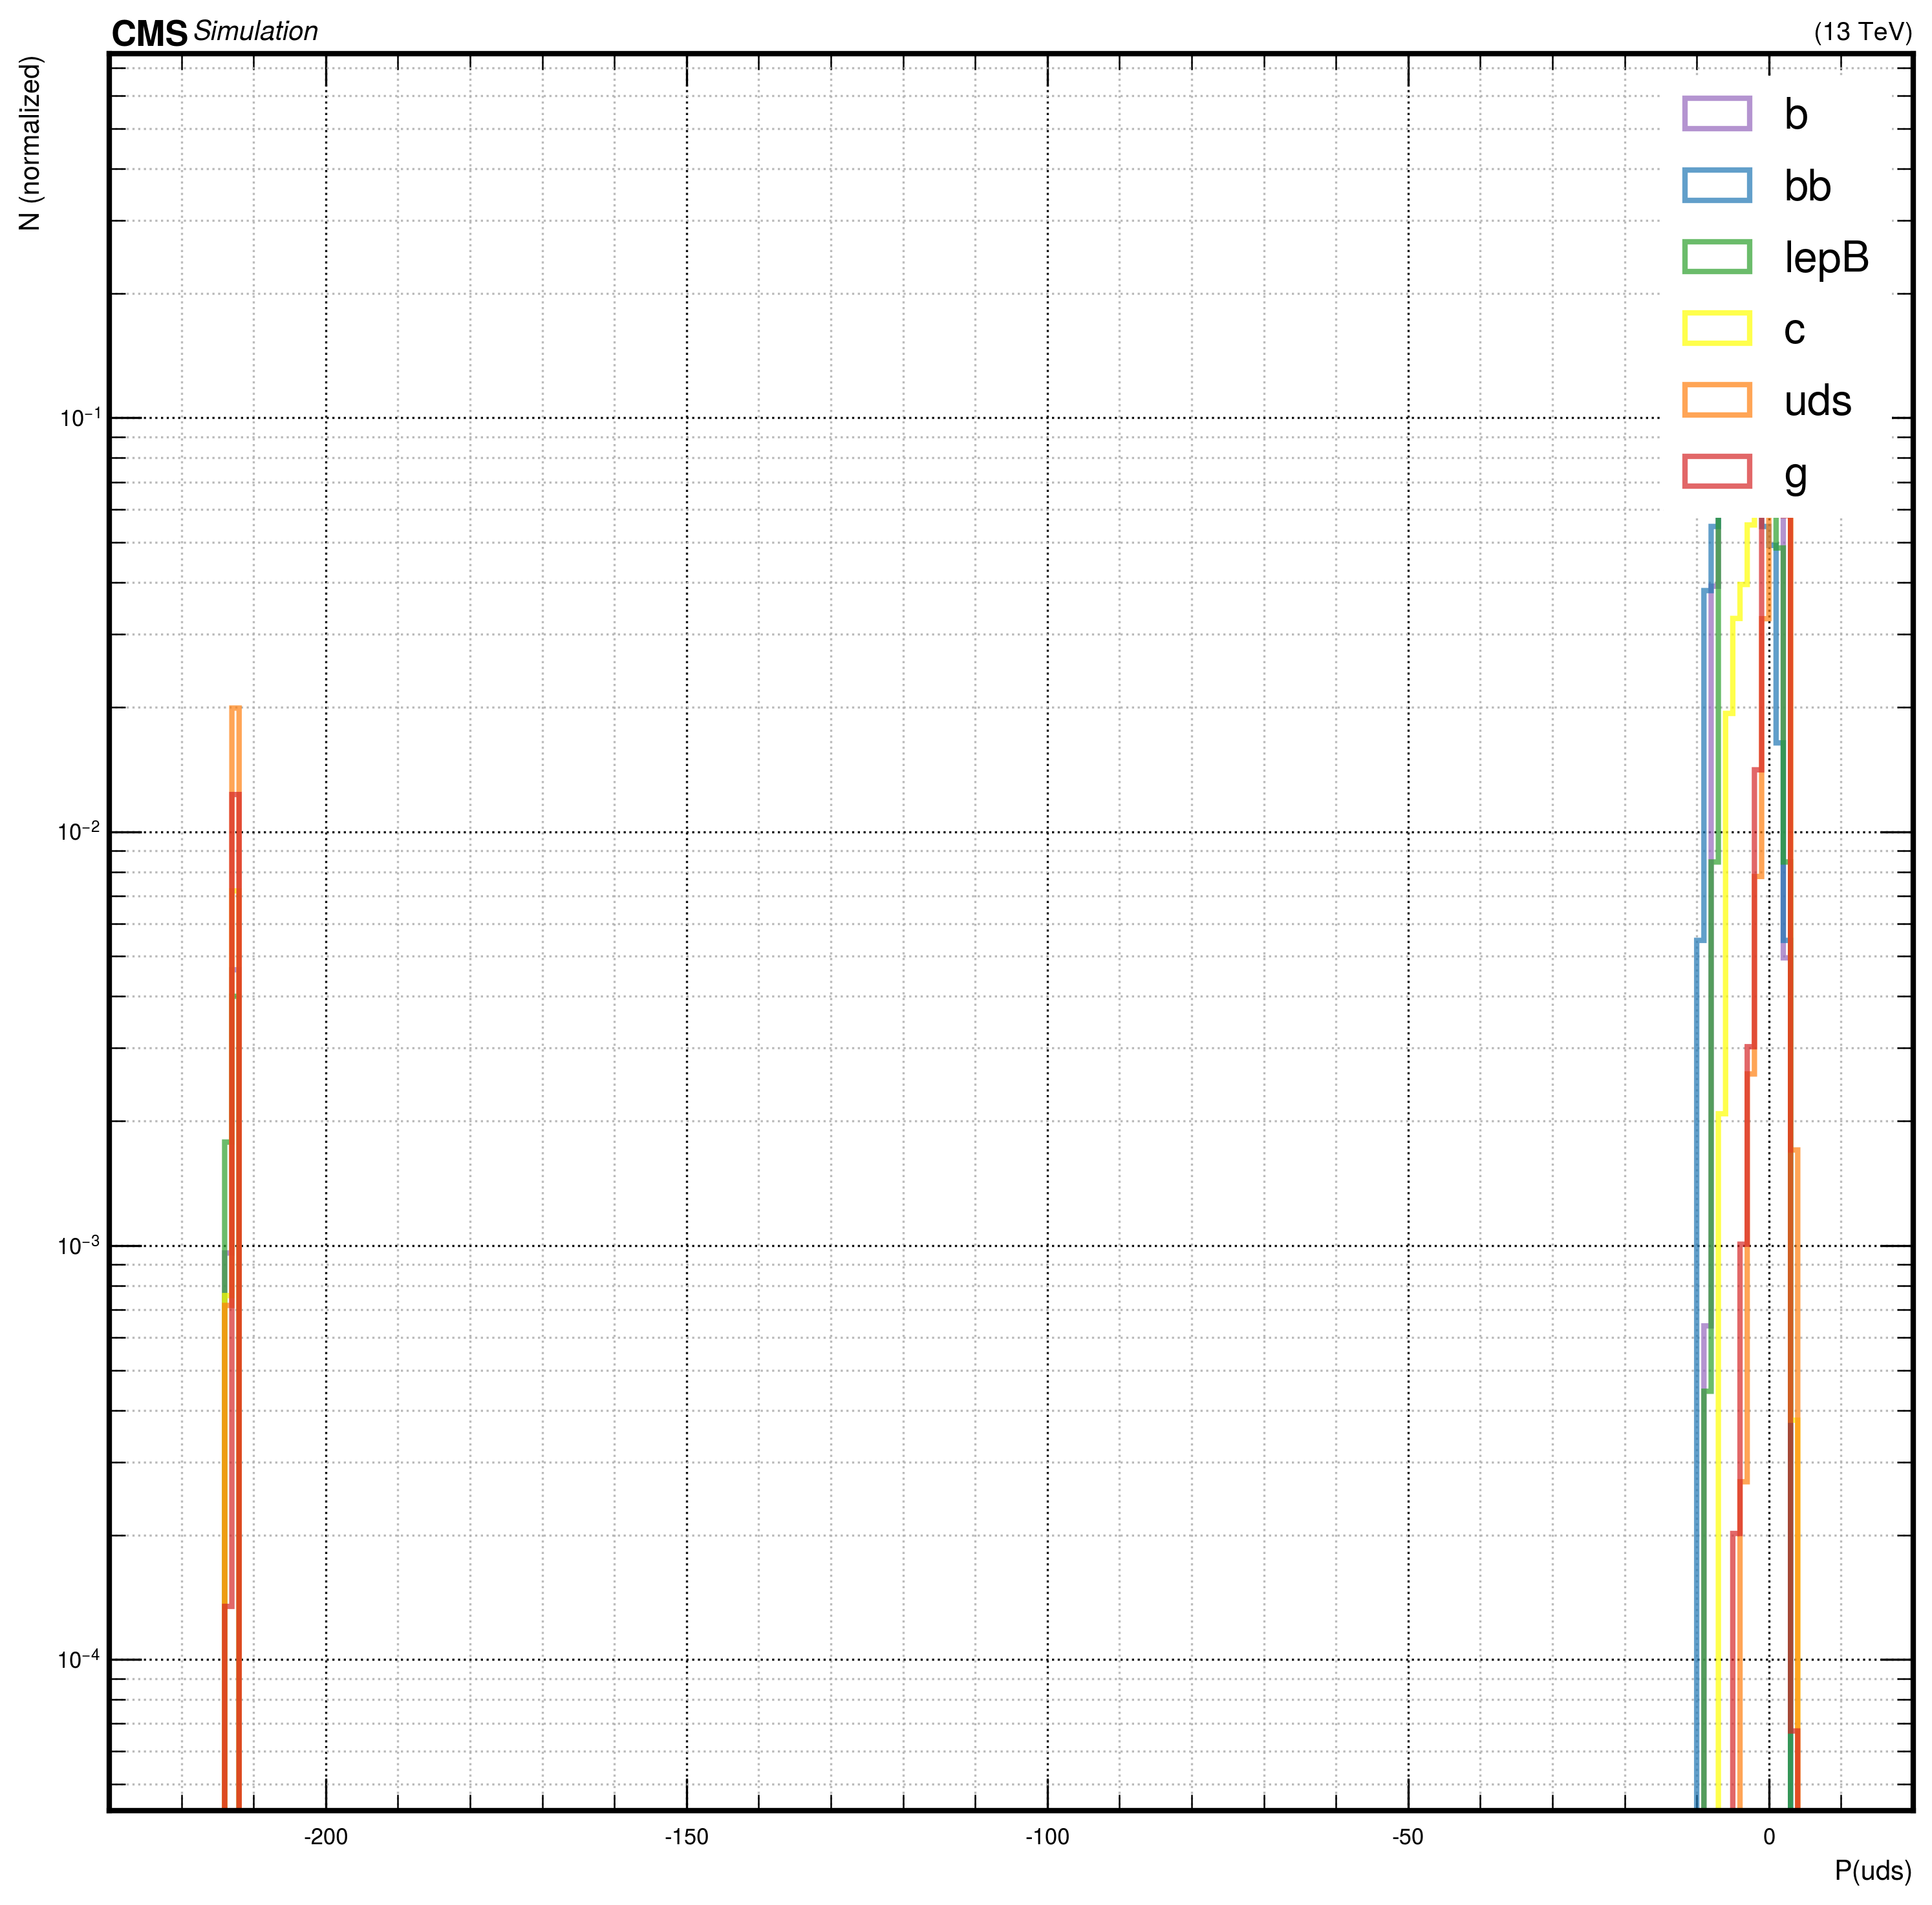

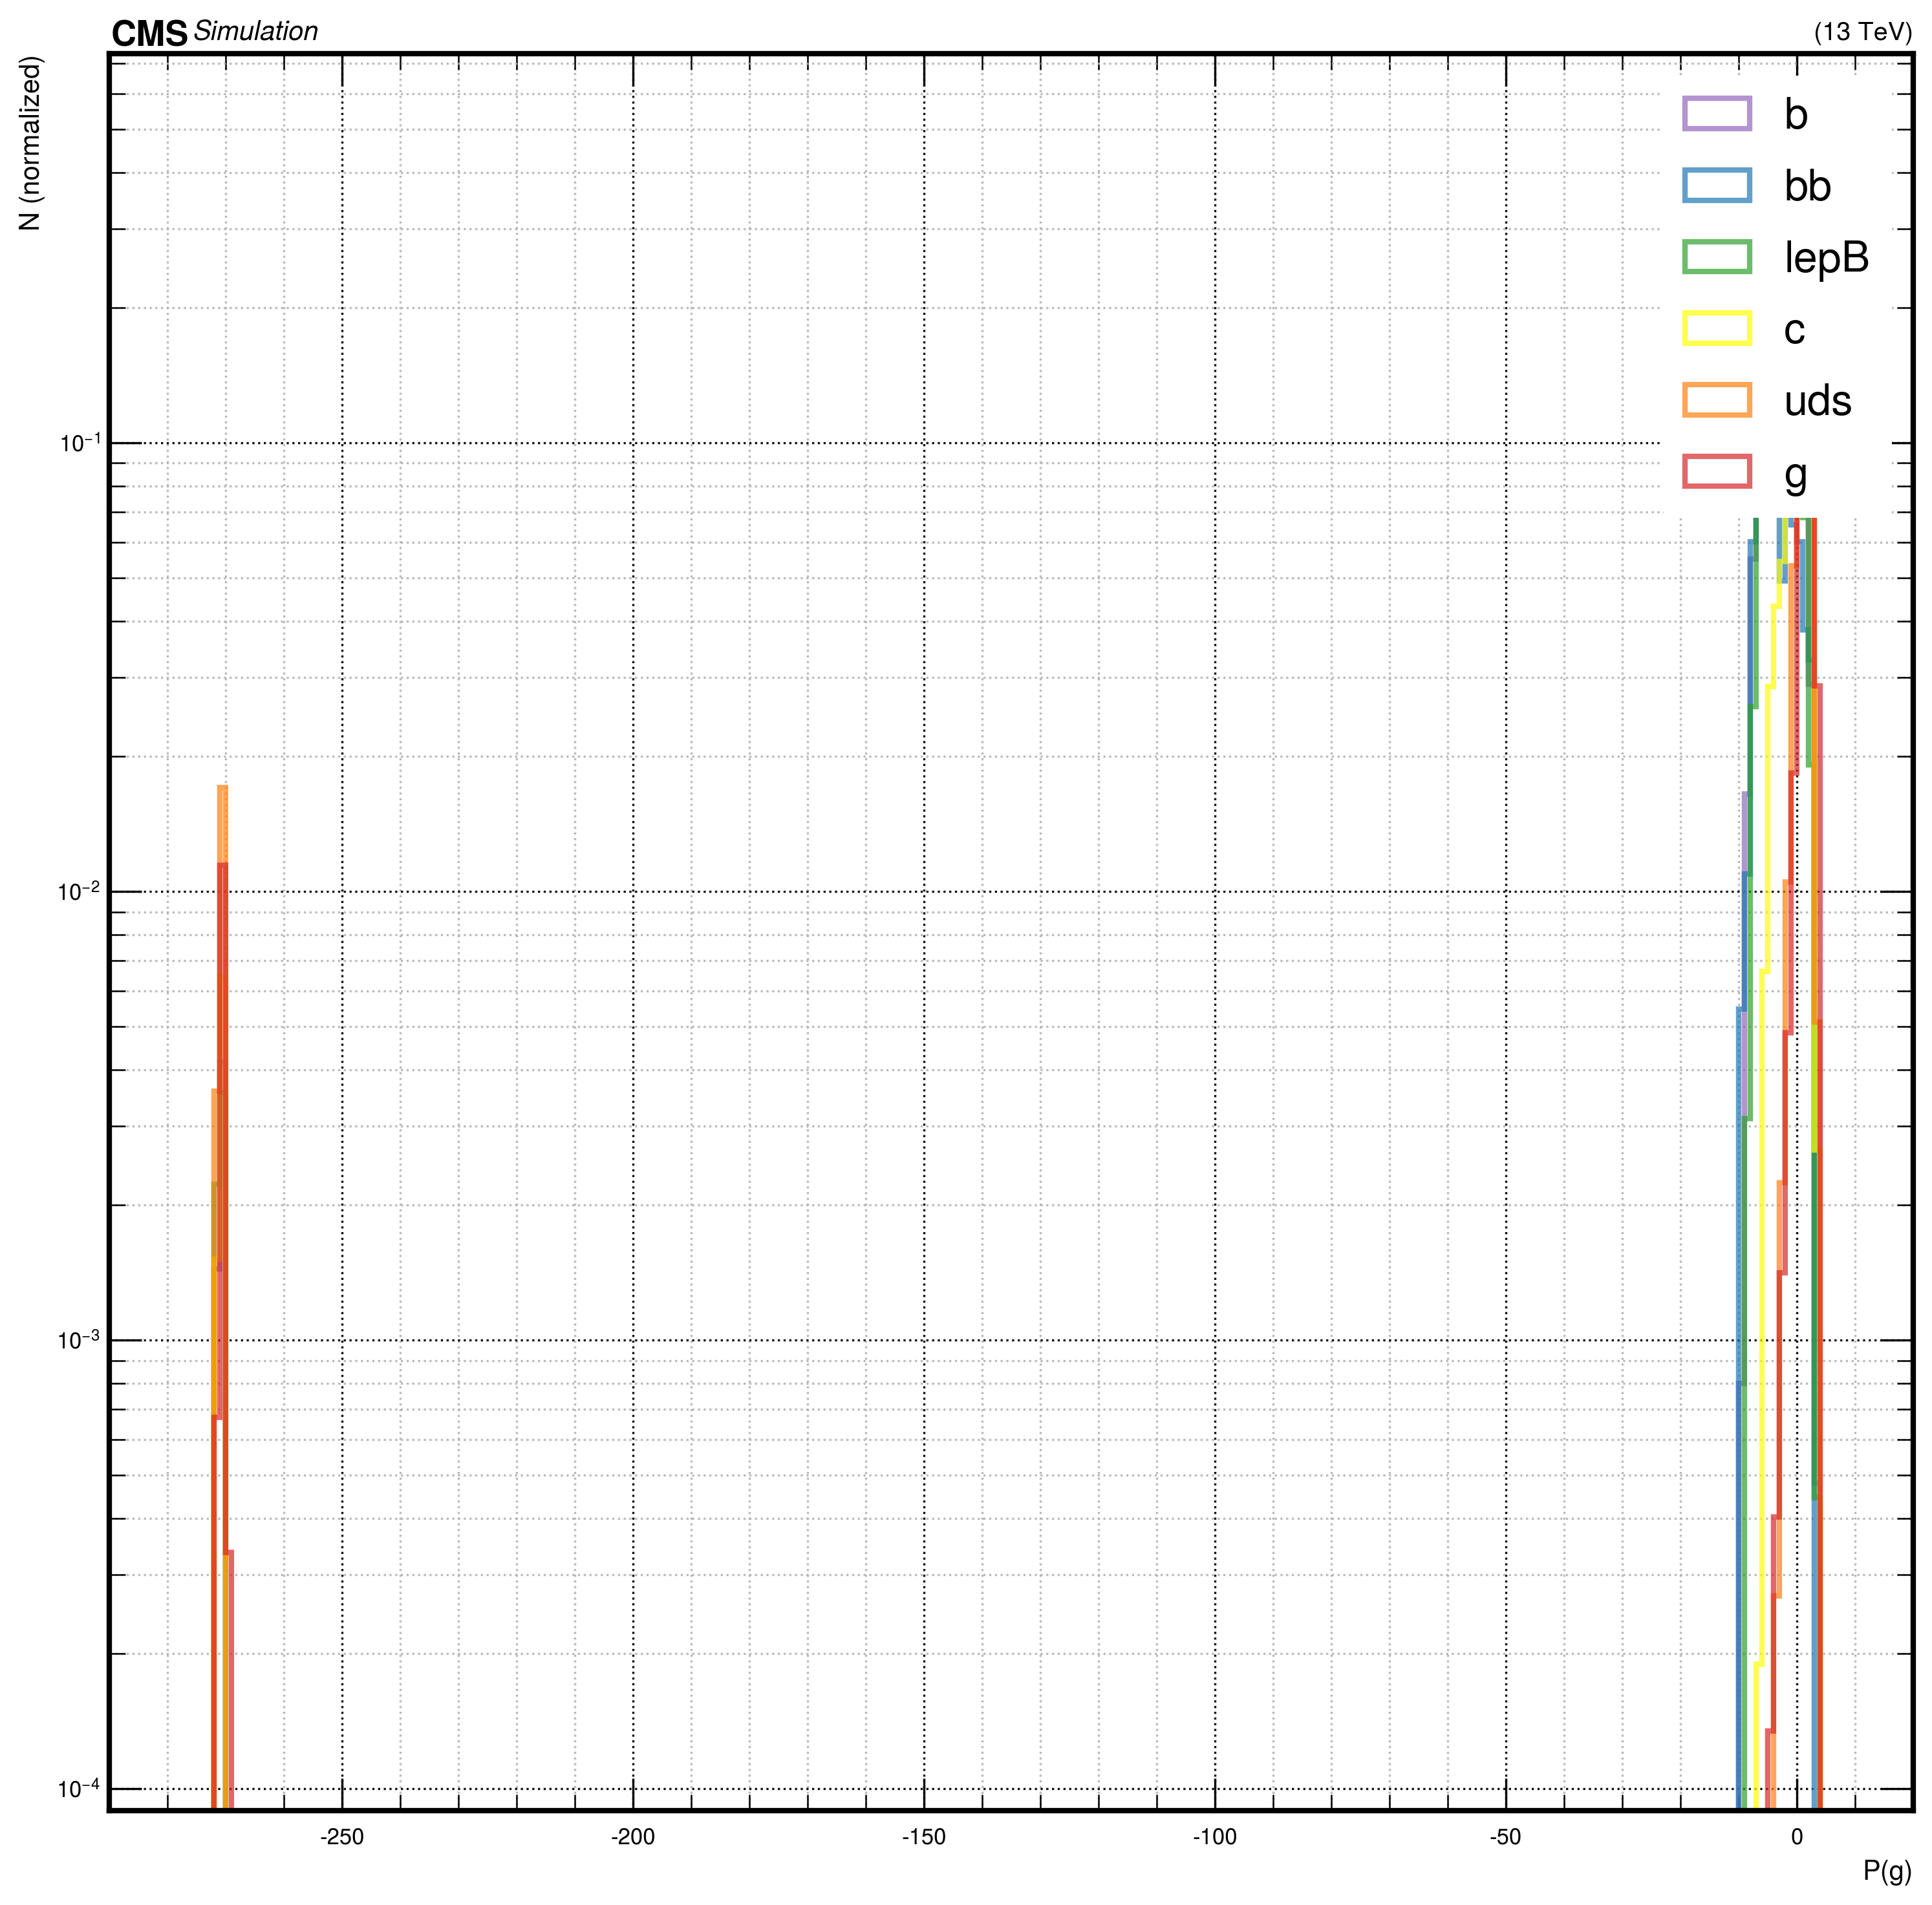

In [34]:
# plot quantities

quantities = ['prob_isB', 'prob_isBB', 'prob_isLeptonicB', 'prob_isC', 'prob_isUDS', 'prob_isG']
ranges = [[-20, 210], [-30, 470], [-20, 110], [-220, 20], [-230, 20], [-290, 20]]
Nbins = [100,100,100,100,100,100]
flavour_names = ['b','bb','lepB','c','uds','g']
flavour_N = bins2
flavour_ids = [1,2,3,4,5,6]
flavour_colors = ['tab:purple', 'tab:blue', 'tab:green', 'yellow', 'tab:orange', 'tab:red']
flavour = variables[quantity_indices['isB'],:]*flavour_ids[0] + variables[quantity_indices['isBB'],:]*flavour_ids[1] \
+ variables[quantity_indices['isLeptonicB'],:]*flavour_ids[2] + variables[quantity_indices['isC'],:]*flavour_ids[3] \
+ variables[quantity_indices['isUDS'],:]*flavour_ids[4] + variables[quantity_indices['isG'],:]*flavour_ids[5]

for i in range(len(quantities)):
    quantity = quantities[i]
    index = quantity_indices[quantity]
    ranges[i][0]=round(np.min(variables[index,:])/10)*10-20
    ranges[i][1]=round(np.max(variables[index,:])/10)*10+20
    fig,ax = plt.subplots(figsize=[12,12], dpi=300)
    ax.set_xlim(left=ranges[i][0], right=ranges[i][1])
    #ax.set_ylim(bottom=1, top=10**5)
    ax.set_yscale('log')
    ax.set_ylabel('N (normalized)')
    ax.set_xlabel(quantity_labels[quantity])
    ax.grid(which='minor', alpha=0.85)
    ax.grid(which='major', alpha=0.95, color='black')
    for j in range(len(flavour_ids)):
        x = variables[index,np.where(flavour==flavour_ids[j])[0]]
        ax.hist(x, bins=800, range=(-400,400), weights=np.ones(len(x))/flavour_N[j], histtype='step', linewidth=2,
        alpha=0.7, color=flavour_colors[j], label=flavour_names[j])
    legloc = 'upper right'
    leg=ax.legend(title='',fontsize=16,title_fontsize=20,labelspacing=0.7,loc=legloc,frameon=True,framealpha=1,facecolor='white')
    if 'right' in legloc:
        aligned = 'right'
    else:
        aligned = 'left'
    leg._legend_box.align = aligned
    leg.get_frame().set_linewidth(0.0)
    hep.cms.label(rlabel='(13 TeV)')
    print('saving')
    fig.savefig('variable_plots/{}.pdf'.format(quantity))

In [26]:
ranges

[[-20, 210], [-30, 470], [-20, 110], [-220, 20], [-230, 20], [-290, 20]]